In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib as mpl
from math import floor
import pingouin as pg

# unlimited number of columns
pd.set_option('display.max_columns', None)

mpl.rcParams['figure.figsize'] = [15, 10]

def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

In [34]:
fakenewsnet = pd.read_csv('../data/fakenewsnet_wf.csv')
isot = pd.read_csv('../data/fn_isot_wf.csv')
fakenewskaggle = pd.read_csv('../data/fn_kaggle_wf.csv')
buzfeed_political = pd.read_csv('../data/fn_buzfeed_wf.csv')
celebrity = pd.read_csv('../data/fn_celebrity_wf.csv')
fakenewsamt = pd.read_csv('../data/fakenewsamt_wf.csv')
fn_randompolitical = pd.read_csv('../data/fn_randompolitical_wf.csv')

datasets = {
    'FakeNewsNet' : fakenewsnet,
    'ISOT' : isot,
    'FakeNewsKaggle' : fakenewskaggle,
    'FakeNewsAMT' : fakenewsamt,
    'FakeNewsRandomPolitical' : fn_randompolitical,
    'FakeNewsCelebrity' : celebrity,
    'FakeNewsBuzfeedPolitical' : buzfeed_political,
}

--- FakeNewsNet ---


moral_care           moral_fairness           moral_loyalty            \
            mean       std           mean       std          mean       std   
label                                                                         
0       3.524938  2.507671       4.285450  3.256218      4.667179  2.818151   
1       3.165304  2.609138       4.158363  3.563375      4.661784  2.898397   

      moral_authority           moral_purity            
                 mean       std         mean       std  
label                                                   
0            5.149556  2.714457     2.856175  3.344316  
1            5.260397  2.645563     3.302882  3.334010

--- ISOT ---


moral_care           moral_fairness           moral_loyalty            \
            mean       std           mean       std          mean       std   
label                                                                         
0       3.623146  2.820134       2.983198  3.429880      5.093092  2.596371   
1       3.210071  2.624599       4.120512  3.472528      4.583854  2.775429   

      moral_authority           moral_purity            
                 mean       std         mean       std  
label                                                   
0            5.018093  2.895845     2.100467  3.173750  
1            4.695666  2.855517     2.871963  3.241472

--- FakeNewsKaggle ---


moral_care           moral_fairness           moral_loyalty            \
            mean       std           mean       std          mean       std   
label                                                                         
0       3.965301  2.457046       4.486963  3.214449      5.531966  2.192039   
1       3.076597  2.432128       4.076851  3.411035      4.339891  2.885086   

      moral_authority           moral_purity            
                 mean       std         mean       std  
label                                                   
0            5.482069  2.352791     3.839303  3.356940  
1            4.538829  2.886127     3.259361  3.305857

--- FakeNewsAMT ---


moral_care           moral_fairness           moral_loyalty            \
            mean       std           mean       std          mean       std   
label                                                                         
0       1.709229  2.816617       1.278864  2.738756      2.882486  3.278229   
1       1.520921  2.635229       1.553431  2.967380      2.886304  3.276281   

      moral_authority           moral_purity            
                 mean       std         mean       std  
label                                                   
0            2.666875  3.292313     1.032666  2.498292  
1            2.909004  3.382682     1.325221  2.814980

--- FakeNewsRandomPolitical ---


moral_care           moral_fairness           moral_loyalty            \
            mean       std           mean       std          mean       std   
label                                                                         
0       4.359726  2.576254       3.789591  3.578443      5.870420  1.867598   
1       2.955320  2.536253       4.036300  3.561964      5.042873  2.377264   

      moral_authority           moral_purity            
                 mean       std         mean       std  
label                                                   
0            5.883009  2.331746     4.015078  3.557564  
1            5.311387  2.907372     3.253985  3.354328

--- FakeNewsCelebrity ---


moral_care           moral_fairness           moral_loyalty            \
            mean       std           mean       std          mean       std   
label                                                                         
0       2.293769  2.797508       2.942496  3.622683      4.995976  3.316291   
1       2.476677  2.746296       2.787466  3.621264      5.361192  2.845613   

      moral_authority           moral_purity            
                 mean       std         mean       std  
label                                                   
0            4.122020  3.362099     2.991332  3.603822  
1            4.242804  3.303012     2.796229  3.258518

--- FakeNewsBuzfeedPolitical ---


moral_care           moral_fairness           moral_loyalty            \
            mean       std           mean       std          mean       std   
label                                                                         
0       3.855213  1.954173       5.522348  2.512892      5.542514  1.879360   
1       2.425401  2.509339       3.261267  3.294999      4.578826  3.204584   

      moral_authority           moral_purity            
                 mean       std         mean       std  
label                                                   
0            5.311431  2.135956     4.075702  2.815966  
1            4.259417  2.977821     3.114034  3.411197

Text(0.5, 1.0, 'Correlation between moral features and disinformation')

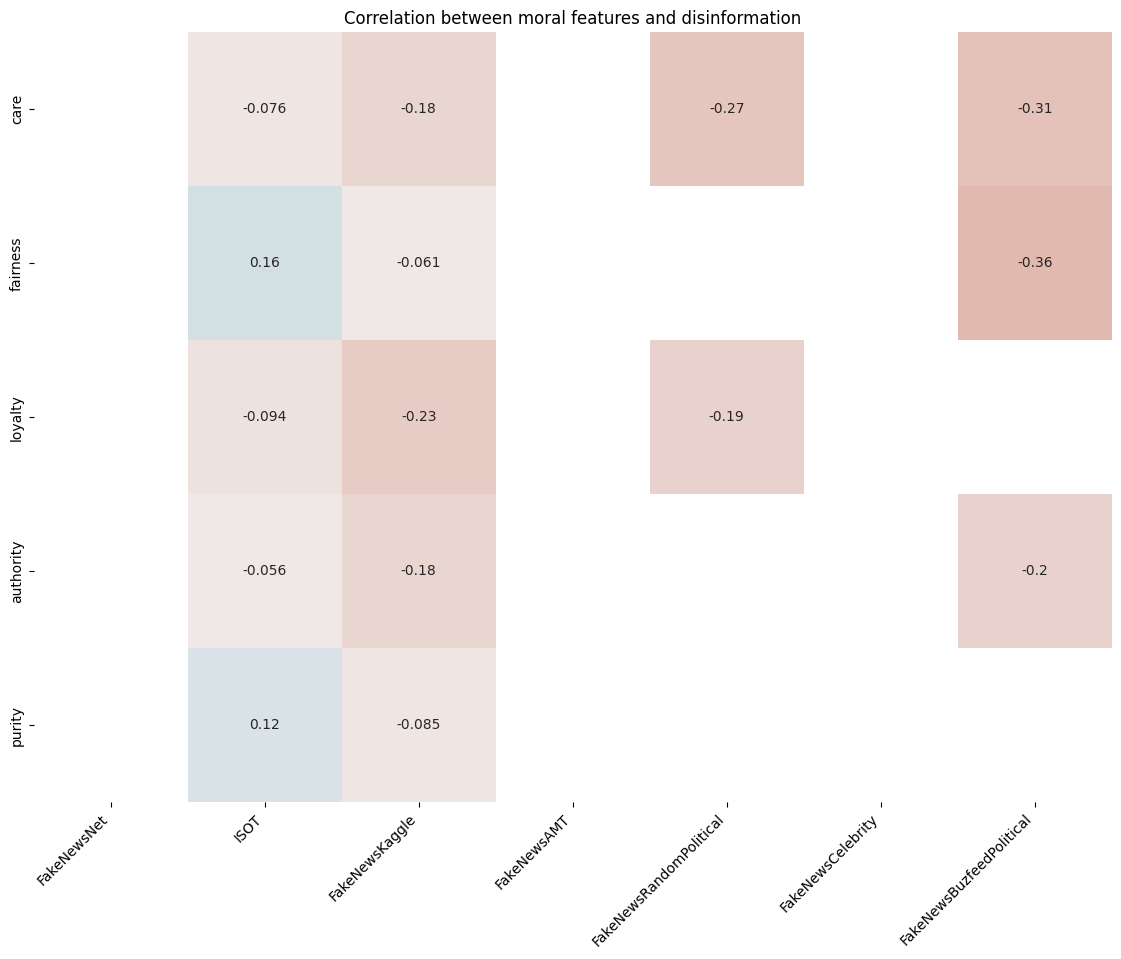

In [35]:

## plot moral correlations

selected_columns = ['label'] + [column for column in datasets['FakeNewsNet'].columns if (column.startswith('moral_')) ]

all_corrs = pd.DataFrame()
all_masks = []

for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('moral_') for column in dataset.columns if (column.startswith('moral_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)
    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
ax = sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between moral features and disinformation')


--- FakeNewsNet ---


readability_Kincaid           readability_ARI            \
                     mean       std            mean       std   
label                                                           
0                2.081511  1.209043        0.970380  1.204134   
1                1.794624  1.363900        0.693114  1.384120   

      readability_Coleman-Liau           readability_FleschReadingEase  \
                          mean       std                          mean   
label                                                                    
0                   -18.049864  1.504423                     81.920250   
1                   -18.394755  1.728202                     83.977162   

                readability_GunningFogIndex           readability_LIX  \
            std                        mean       std            mean   
label                                                                   
0      8.668146                    6.548897  1.525858       24.037893   
1      9.778442                    6.293849  1.680703       23.008209   

                readability_SMOGIndex           readability_RIX            \
            std                  mean       std            mean       std   
label                                                                       
0      4.432397              5.131254  0.263747        0.230368  0.044331   
1      4.736242              5.081493  0.297063        0.220080  0.047365   

      readability_DaleChallIndex            
                            mean       std  
label                                       
0                       5.346346  0.936423  
1                       4.890311  0.976135

--- ISOT ---


readability_Kincaid           readability_ARI            \
                     mean       std            mean       std   
label                                                           
0                3.408407  1.339859        2.425031  1.238322   
1                2.595489  1.463273        1.809074  1.610496   

      readability_Coleman-Liau           readability_FleschReadingEase  \
                          mean       std                          mean   
label                                                                    
0                   -19.108498  1.682932                     72.247512   
1                   -20.071407  2.165105                     78.067192   

                 readability_GunningFogIndex           readability_LIX  \
             std                        mean       std            mean   
label                                                                    
0       9.606634                    8.216775  1.641736       28.852962   
1      10.490650                    7.116903  1.686246       25.372857   

                readability_SMOGIndex          readability_RIX            \
            std                  mean      std            mean       std   
label                                                                      
0      4.405049              5.302467  0.24352        0.254354  0.040360   
1      4.963945              5.123843  0.27599        0.221539  0.045333   

      readability_DaleChallIndex            
                            mean       std  
label                                       
0                       6.488942  0.825124  
1                       5.515518  0.966776

--- FakeNewsKaggle ---


readability_Kincaid           readability_ARI            \
                     mean       std            mean       std   
label                                                           
0                1.630266  1.259254        0.632231  1.243773   
1                2.326599  1.754942        1.367802  2.848381   

      readability_Coleman-Liau           readability_FleschReadingEase  \
                          mean       std                          mean   
label                                                                    
0                   -21.759266  1.834073                     84.975022   
1                   -20.777458  3.772544                     79.986958   

                 readability_GunningFogIndex           readability_LIX  \
             std                        mean       std            mean   
label                                                                    
0       9.020904                    6.663544  1.481228       24.187517   
1      12.581173                    7.062248  1.844236       25.404655   

                readability_SMOGIndex           readability_RIX            \
            std                  mean       std            mean       std   
label                                                                       
0      4.196604              5.047082  0.251597        0.209445  0.038729   
1      5.248029              5.105868  0.306817        0.220815  0.047789   

      readability_DaleChallIndex            
                            mean       std  
label                                       
0                       5.921549  0.845725  
1                       5.942436  1.089862

--- FakeNewsAMT ---


readability_Kincaid           readability_ARI            \
                     mean       std            mean       std   
label                                                           
0                2.959917  1.693516        2.280576  1.766907   
1                2.586674  1.721179        1.771093  1.749442   

      readability_Coleman-Liau           readability_FleschReadingEase  \
                          mean       std                          mean   
label                                                                    
0                   -19.384415  2.493149                     75.459466   
1                   -20.048618  2.395190                     78.133647   

                 readability_GunningFogIndex           readability_LIX  \
             std                        mean       std            mean   
label                                                                    
0      12.142696                    7.135253  2.062997       27.312139   
1      12.343589                    6.750399  2.047820       25.431986   

                readability_SMOGIndex           readability_RIX            \
            std                  mean       std            mean       std   
label                                                                       
0      6.222465              5.122806  0.329255        0.239850  0.057271   
1      6.124796              5.055343  0.347378        0.222451  0.055811   

      readability_DaleChallIndex            
                            mean       std  
label                                       
0                       6.135132  1.065644  
1                       5.771276  1.137457

--- FakeNewsRandomPolitical ---


readability_Kincaid           readability_ARI            \
                     mean       std            mean       std   
label                                                           
0                2.765982  1.245971        1.951265  1.225870   
1                1.859790  1.496887        0.867959  1.659249   

      readability_Coleman-Liau           readability_FleschReadingEase  \
                          mean       std                          mean   
label                                                                    
0                   -19.966945  1.712508                     76.839892   
1                   -20.958220  2.210331                     83.354908   

                 readability_GunningFogIndex           readability_LIX  \
             std                        mean       std            mean   
label                                                                    
0       8.931099                    7.943435  1.300612       27.421519   
1      10.729186                    7.000707  1.738894       24.085916   

                readability_SMOGIndex           readability_RIX            \
            std                  mean       std            mean       std   
label                                                                       
0      3.626027              5.257458  0.206116        0.239506  0.033694   
1      4.380395              5.113279  0.286020        0.211578  0.040296   

      readability_DaleChallIndex            
                            mean       std  
label                                       
0                       6.357864  0.806401  
1                       5.970461  0.977661

--- FakeNewsCelebrity ---


readability_Kincaid           readability_ARI            \
                     mean       std            mean       std   
label                                                           
0                1.210926  1.041338        0.272241  1.216176   
1                0.923325  1.036094       -0.026327  1.117814   

      readability_Coleman-Liau           readability_FleschReadingEase  \
                          mean       std                          mean   
label                                                                    
0                   -23.036356  1.960671                     87.942472   
1                   -22.976091  1.700879                     90.025582   

                readability_GunningFogIndex           readability_LIX  \
            std                        mean       std            mean   
label                                                                   
0      7.460548                    5.213717  1.233047       20.801862   
1      7.434410                    5.028020  1.136374       20.170295   

                readability_SMOGIndex           readability_RIX            \
            std                  mean       std            mean       std   
label                                                                       
0      3.803738              4.774560  0.232155        0.174937  0.035061   
1      3.791808              4.750877  0.215498        0.171258  0.033689   

      readability_DaleChallIndex            
                            mean       std  
label                                       
0                       5.200385  0.928914  
1                       5.325419  0.839095

--- FakeNewsBuzfeedPolitical ---


readability_Kincaid           readability_ARI            \
                     mean       std            mean       std   
label                                                           
0                2.065762  1.176289        0.964500  1.207306   
1                1.717668  1.723144        0.605515  1.779436   

      readability_Coleman-Liau           readability_FleschReadingEase  \
                          mean       std                          mean   
label                                                                    
0                   -21.657403  1.810326                     81.837524   
1                   -21.373304  2.365091                     84.369451   

                readability_GunningFogIndex           readability_LIX  \
            std                        mean       std            mean   
label                                                                   
0       8.42366                    6.770294  1.330617       24.163814   
1      12.35094                    6.516566  1.906387       23.507578   

                readability_SMOGIndex           readability_RIX            \
            std                  mean       std            mean       std   
label                                                                       
0      4.245482              5.059128  0.222268        0.207385  0.039269   
1      6.220395              5.026457  0.312205        0.205743  0.056773   

      readability_DaleChallIndex            
                            mean       std  
label                                       
0                       5.609345  0.946245  
1                       5.950229  0.982843

Text(0.5, 1.0, 'Correlation between readability grades and disinformation')

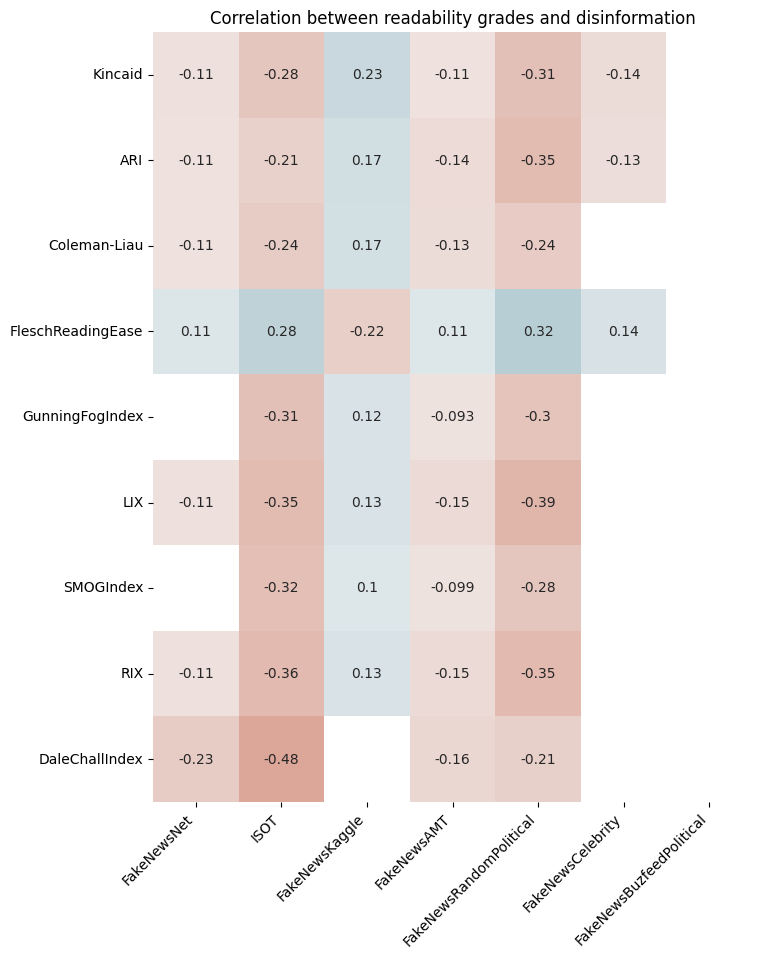

In [36]:
## plot readability grades correlations

selected_columns = ['label'] + ['readability_Kincaid',
 'readability_ARI',
 'readability_Coleman-Liau',
 'readability_FleschReadingEase',
 'readability_GunningFogIndex',
 'readability_LIX',
 'readability_SMOGIndex',
 'readability_RIX',
 'readability_DaleChallIndex']

all_corrs = pd.DataFrame()
all_masks = []

for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('readability_') for column in selected_columns if (column.startswith('readability_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)
    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
ax = sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between readability grades and disinformation')

/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is 

--- FakeNewsNet ---


/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])


readability_characters_per_word           readability_syll_per_word  \
                                 mean       std                      mean   
label                                                                       
0                            4.649768  0.255651                  1.464537   
1                            4.590896  0.293867                  1.440223   

                readability_words_per_sentence            \
            std                           mean       std   
label                                                      
0      0.102460                       0.999942  0.000518   
1      0.115584                       0.999985  0.000202   

      readability_sentences_per_paragraph              \
                                     mean         std   
label                                                   
0                              638.119403  773.266161   
1                              444.859649  375.571710   

      readability_type_token_ratio           readability_directspeech_ratio  \
                              mean       std                           mean   
label                                                                         
0                         0.523414  0.091483                            0.0   
1                         0.557530  0.104532                            0.0   

           readability_characters              readability_syllables  \
       std                   mean          std                  mean   
label                                                                  
0      0.0            2970.870647  3598.331178            936.388060   
1      0.0            2028.339181  1597.081515            636.163743   

                   readability_words             readability_wordtypes  \
               std              mean         std                  mean   
label                                                                    
0      1139.161652        638.094527  773.272175            288.228856   
1       504.431698        444.853801  375.572750            223.362573   

                  readability_sentences             readability_paragraphs  \
              std                  mean         std                   mean   
label                                                                        
0      258.180765            638.119403  773.266161                    1.0   
1      115.419886            444.859649  375.571710                    1.0   

           readability_long_words             readability_complex_words  \
       std                   mean         std                      mean   
label                                                                     
0      0.0             147.273632  179.673564                 98.781095   
1      0.0              96.368421   72.712641                 64.333333   

                  readability_complex_words_dc              
              std                         mean         std  
label                                                       
0      121.718289                   214.119403  270.943215  
1       48.472309                   133.152047  102.225300

/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is 

--- ISOT ---


/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])


readability_characters_per_word           readability_syll_per_word  \
                                 mean       std                      mean   
label                                                                       
0                            4.968122  0.263082                  1.579947   
1                            4.837854  0.342469                  1.511213   

                readability_words_per_sentence            \
            std                           mean       std   
label                                                      
0      0.113558                       0.910353  0.021091   
1      0.124003                       0.905565  0.031799   

      readability_sentences_per_paragraph              \
                                     mean         std   
label                                                   
0                              431.913990  311.708006   
1                              493.106754  450.252052   

      readability_type_token_ratio           readability_directspeech_ratio  \
                              mean       std                           mean   
label                                                                         
0                         0.584494  0.108941                       0.017742   
1                         0.573955  0.103951                       0.000160   

                readability_characters              readability_syllables  \
            std                   mean          std                  mean   
label                                                                       
0      0.019373            1941.274468  1381.402545            615.717734   
1      0.001098            2168.223457  2063.399651            679.845471   

                  readability_words             readability_wordtypes  \
              std              mean         std                  mean   
label                                                                   
0      437.035347        392.842081  282.789207            204.521666   
1      658.181313        446.237082  407.746445            230.062699   

                  readability_sentences             readability_paragraphs  \
              std                  mean         std                   mean   
label                                                                        
0      119.847007            431.913990  311.708006                    1.0   
1      147.187973            493.106754  450.252052                    1.0   

           readability_long_words             readability_complex_words  \
       std                   mean         std                      mean   
label                                                                     
0      0.0             108.157826   76.611293                 75.469976   
1      0.0             111.241294  116.965027                 77.117465   

                 readability_complex_words_dc              
             std                         mean         std  
label                                                      
0      53.924525                   159.108424  114.368918  
1      84.679271                   155.784027  159.230105

/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is 

--- FakeNewsKaggle ---


readability_characters_per_word           readability_syll_per_word  \
                                 mean       std                      mean   
label                                                                       
0                            4.588728  0.263640                  1.429644   
1                            4.744645  0.604755                  1.488575   

                readability_words_per_sentence            \
            std                           mean       std   
label                                                      
0      0.106581                       0.898641  0.018843   
1      0.148709                       0.901050  0.028226   

      readability_sentences_per_paragraph               \
                                     mean          std   
label                                                    
0                             1022.335876   850.457549   
1                              843.989191  1205.660846   

      readability_type_token_ratio           readability_directspeech_ratio  \
                              mean       std                           mean   
label                                                                         
0                         0.472169  0.088905                       0.038170   
1                         0.544499  0.143080                       0.025015   

                readability_characters              readability_syllables  \
            std                   mean          std                  mean   
label                                                                       
0      0.016880            4195.108322  3412.168848           1305.269164   
1      0.019245            3595.746251  4981.935308           1134.272801   

                   readability_words              readability_wordtypes  \
               std              mean          std                  mean   
label                                                                     
0      1060.152133        918.514578   760.068422            387.036976   
1      1573.079980        760.413052  1082.499737            323.575057   

                  readability_sentences              readability_paragraphs  \
              std                  mean          std                   mean   
label                                                                         
0      228.662676           1022.335876   850.457549                    1.0   
1      300.719299            843.989191  1205.660846                    1.0   

           readability_long_words             readability_complex_words  \
       std                   mean         std                      mean   
label                                                                     
0      0.0             210.502607  168.118344                142.078394   
1      0.0             184.791785  244.003136                128.028645   

                  readability_complex_words_dc              
              std                         mean         std  
label                                                       
0      114.180776                   333.999131  263.531264  
1      169.399203                   275.810431  361.591921

/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is 

--- FakeNewsAMT ---


readability_characters_per_word           readability_syll_per_word  \
                                 mean       std                      mean   
label                                                                       
0                            4.937660  0.375229                  1.542004   
1                            4.829596  0.371634                  1.510406   

                readability_words_per_sentence            \
            std                           mean       std   
label                                                      
0      0.143539                       0.908393  0.033680   
1      0.145931                       0.907393  0.030794   

      readability_sentences_per_paragraph             \
                                     mean        std   
label                                                  
0                              139.200000  36.312359   
1                              133.470833  40.658790   

      readability_type_token_ratio           readability_directspeech_ratio  \
                              mean       std                           mean   
label                                                                         
0                         0.692927  0.058358                       0.005598   
1                         0.686369  0.062116                       0.002401   

                readability_characters             readability_syllables  \
            std                   mean         std                  mean   
label                                                                      
0      0.007467             618.812500  144.669708            192.916667   
1      0.005123             581.216667  168.704301            181.658333   

                 readability_words            readability_wordtypes  \
             std              mean        std                  mean   
label                                                                 
0      44.597706        126.533333  33.603256             86.541667   
1      53.290551        120.912500  36.221030             81.725000   

                 readability_sentences            readability_paragraphs       \
             std                  mean        std                   mean  std   
label                                                                           
0      18.749124            139.200000  36.312359                    1.0  0.0   
1      20.315900            133.470833  40.658790                    1.0  0.0   

      readability_long_words            readability_complex_words            \
                        mean        std                      mean       std   
label                                                                         
0                    32.5375   8.825994                 20.833333  6.693322   
1                    29.3625  10.633385                 19.070833  7.709093   

      readability_complex_words_dc             
                              mean        std  
label                                          
0                        47.808333  11.428728  
1                        43.433333  14.367696

/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is 

--- FakeNewsRandomPolitical ---


/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is 

readability_characters_per_word           readability_syll_per_word  \
                                 mean       std                      mean   
label                                                                       
0                            4.868338  0.260263                  1.525754   
1                            4.637259  0.352197                  1.448622   

                readability_words_per_sentence            \
            std                           mean       std   
label                                                      
0      0.105557                       0.902782  0.021083   
1      0.126805                       0.912935  0.019474   

      readability_sentences_per_paragraph              \
                                     mean         std   
label                                                   
0                              813.133333  465.311239   
1                              551.933333  393.934050   

      readability_type_token_ratio           readability_directspeech_ratio  \
                              mean       std                           mean   
label                                                                         
0                         0.488528  0.067020                       0.029197   
1                         0.539306  0.083421                       0.041098   

                readability_characters              readability_syllables  \
            std                   mean          std                  mean   
label                                                                       
0      0.024469            3571.560000  2039.291804               1122.28   
1      0.017581            2318.333333  1628.789198                724.68   

                  readability_words             readability_wordtypes  \
              std              mean         std                  mean   
label                                                                   
0      650.035104        733.373333  417.104199                336.32   
1      512.580018        504.200000  360.693551                247.64   

                  readability_sentences             readability_paragraphs  \
              std                  mean         std                   mean   
label                                                                        
0      146.850923            813.133333  465.311239                    1.0   
1      130.247129            551.933333  393.934050                    1.0   

           readability_long_words             readability_complex_words  \
       std                   mean         std                      mean   
label                                                                     
0      0.0             194.200000  112.846943                140.226667   
1      0.0             114.666667   81.763227                 81.973333   

                 readability_complex_words_dc              
             std                         mean         std  
label                                                      
0      86.566421                   294.733333  172.629531  
1      58.675234                   186.333333  129.756043

/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is 

--- FakeNewsCelebrity ---


readability_characters_per_word           readability_syll_per_word  \
                                 mean       std                      mean   
label                                                                       
0                            4.514622  0.257873                  1.394830   
1                            4.449971  0.237960                  1.370065   

                readability_words_per_sentence            \
            std                           mean       std   
label                                                      
0      0.088152                       0.876744  0.027660   
1      0.087921                       0.888624  0.031827   

      readability_sentences_per_paragraph               \
                                     mean          std   
label                                                    
0                                 607.428  1290.508068   
1                                 397.268   223.965942   

      readability_type_token_ratio           readability_directspeech_ratio  \
                              mean       std                           mean   
label                                                                         
0                         0.557849  0.098649                       0.017690   
1                         0.563088  0.086296                       0.024427   

                readability_characters              readability_syllables  \
            std                   mean          std                  mean   
label                                                                       
0      0.019759               2330.684  4433.281334               720.812   
1      0.022466               1571.320   904.630947               483.836   

                   readability_words              readability_wordtypes  \
               std              mean          std                  mean   
label                                                                     
0      1372.176195           530.256  1109.146634               232.684   
1       279.664574           352.828   200.205072               185.708   

                  readability_sentences              readability_paragraphs  \
              std                  mean          std                   mean   
label                                                                         
0      211.576698               607.428  1290.508068                    1.0   
1       80.800406               397.268   223.965942                    1.0   

           readability_long_words             readability_complex_words  \
       std                   mean         std                      mean   
label                                                                     
0      0.0                 97.928  148.441931                    59.904   
1      0.0                 67.784   41.900357                    41.404   

                 readability_complex_words_dc              
             std                         mean         std  
label                                                      
0      90.235873                      159.788  240.565229  
1      27.601888                      116.308   65.468386

/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is 

--- FakeNewsBuzfeedPolitical ---


/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  _ , p = stats.pearsonr(df[col],df[col2])
/tmp/ipykernel_12926/2764143857.py:19: ConstantInputWarning: An input array is constant; the correlation coefficient is 

readability_characters_per_word           readability_syll_per_word  \
                                 mean       std                      mean   
label                                                                       
0                            4.660180  0.255915                  1.466832   
1                            4.581801  0.377727                  1.436660   

                readability_words_per_sentence            \
            std                           mean       std   
label                                                      
0      0.099506                       0.890102  0.020479   
1      0.145972                       0.910465  0.020101   

      readability_sentences_per_paragraph               \
                                     mean          std   
label                                                    
0                             1637.358491  1761.938804   
1                              462.541667   401.976709   

      readability_type_token_ratio           readability_directspeech_ratio  \
                              mean       std                           mean   
label                                                                         
0                         0.446646  0.112792                       0.023313   
1                         0.552580  0.081270                       0.039782   

                readability_characters              readability_syllables  \
            std                   mean          std                  mean   
label                                                                       
0      0.015676             6869.09434  7604.088233           2181.622642   
1      0.020361             1929.31250  1692.500092            604.062500   

                   readability_words              readability_wordtypes  \
               std              mean          std                  mean   
label                                                                     
0      2460.758187       1457.377358  1563.680326            527.452830   
1       530.368776        419.729167   361.960368            209.833333   

                 readability_sentences              readability_paragraphs  \
             std                  mean          std                   mean   
label                                                                        
0      380.08595           1637.358491  1761.938804                    1.0   
1      126.24214            462.541667   401.976709                    1.0   

           readability_long_words             readability_complex_words  \
       std                   mean         std                      mean   
label                                                                     
0      0.0             345.830189  391.406818                241.113208   
1      0.0              97.250000   95.982600                 65.395833   

                  readability_complex_words_dc              
              std                         mean         std  
label                                                       
0      280.834242                   513.358491  549.276485  
1       62.186658                   160.062500  153.705494

Text(0.5, 1.0, 'Correlation between readability sentence info and disinformation')

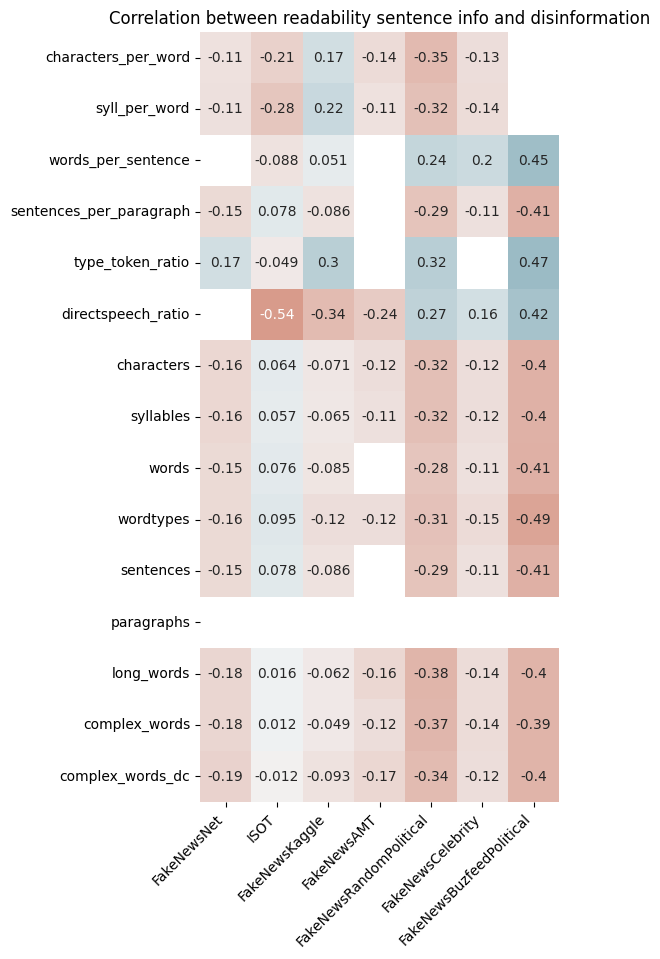

In [37]:
## plot readability sentence info correlations

selected_columns = ['label'] + ['readability_characters_per_word',
 'readability_syll_per_word',
 'readability_words_per_sentence',
 'readability_sentences_per_paragraph',
 'readability_type_token_ratio',
 'readability_directspeech_ratio',
 'readability_characters',
 'readability_syllables',
 'readability_words',
 'readability_wordtypes',
 'readability_sentences',
 'readability_paragraphs',
 'readability_long_words',
 'readability_complex_words',
 'readability_complex_words_dc']

all_corrs = pd.DataFrame()
all_masks = []

for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('readability_') for column in selected_columns if (column.startswith('readability_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)

    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
ax = sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between readability sentence info and disinformation')

--- FakeNewsNet ---


readability_tobeverb            readability_auxverb            \
                      mean        std                mean       std   
label                                                                 
0                19.726368  23.816586            6.890547  8.554996   
1                16.064327  14.658523            5.865497  5.629704   

      readability_conjunction            readability_pronoun             \
                         mean        std                mean        std   
label                                                                     
0                   19.955224  28.611064           52.437811  69.730964   
1                   14.228070  13.722910           44.602339  62.919040   

      readability_preposition            readability_nominalization             
                         mean        std                       mean        std  
label                                                                           
0                   79.442786  98.197647                   9.039801  11.907914  
1                   56.444444  47.857891                   6.953216   6.970368

--- ISOT ---


readability_tobeverb            readability_auxverb            \
                      mean        std                mean       std   
label                                                                 
0                10.123552   8.807398            4.758265  4.912199   
1                14.903061  13.871771            4.718595  5.140950   

      readability_conjunction            readability_pronoun             \
                         mean        std                mean        std   
label                                                                     
0                   10.552111   8.875037            21.82471  19.720169   
1                   12.780845  14.038527            36.50921  32.131972   

      readability_preposition            readability_nominalization             
                         mean        std                       mean        std  
label                                                                           
0                   52.868650  37.892648                   9.627568   8.125681  
1                   56.032761  53.533586                   7.838794  11.421115

--- FakeNewsKaggle ---


readability_tobeverb            readability_auxverb             \
                      mean        std                mean        std   
label                                                                  
0                28.928075  26.818760            9.246959   9.835355   
1                28.949601  46.585148            9.782462  17.511007   

      readability_conjunction            readability_pronoun              \
                         mean        std                mean         std   
label                                                                      
0                   27.211334  25.318823           65.614308   70.932707   
1                   24.626807  38.498187           57.931090  101.704303   

      readability_preposition             readability_nominalization  \
                         mean         std                       mean   
label                                                                  
0                  116.544989   97.465612                  15.419869   
1                   95.544116  134.330810                  14.534793   

                  
             std  
label             
0      14.161427  
1      20.456260

--- FakeNewsAMT ---


readability_tobeverb           readability_auxverb            \
                      mean       std                mean       std   
label                                                                
0                 3.533333  2.673075            1.550000  1.588926   
1                 4.362500  2.679117            1.729167  1.535352   

      readability_conjunction           readability_pronoun            \
                         mean       std                mean       std   
label                                                                   
0                    3.375000  2.049849                7.30  5.579550   
1                    3.429167  2.276674                7.85  4.845996   

      readability_preposition           readability_nominalization            
                         mean       std                       mean       std  
label                                                                         
0                   16.566667  5.767073                   2.170833  2.090020  
1                   15.766667  6.162694                   1.954167  2.017181

--- FakeNewsRandomPolitical ---


readability_tobeverb            readability_auxverb            \
                      mean        std                mean       std   
label                                                                 
0                19.480000  12.218019            8.346667  7.547137   
1                15.933333  12.853996            5.840000  5.437706   

      readability_conjunction            readability_pronoun             \
                         mean        std                mean        std   
label                                                                     
0                   19.813333  13.405015           46.093333  29.728125   
1                   14.200000  14.082767           40.880000  41.386106   

      readability_preposition            readability_nominalization             
                         mean        std                       mean        std  
label                                                                           
0                   92.200000  52.130035                  19.800000  15.415857  
1                   59.973333  41.789684                   8.213333   7.577159

--- FakeNewsCelebrity ---


readability_tobeverb            readability_auxverb             \
                      mean        std                mean        std   
label                                                                  
0                   22.024  59.454341               5.164  16.717146   
1                   15.640   9.881954               3.852   3.583499   

      readability_conjunction            readability_pronoun              \
                         mean        std                mean         std   
label                                                                      
0                      17.388  40.118968              56.892  176.809498   
1                      11.204   7.421502              32.488   21.013714   

      readability_preposition             readability_nominalization            
                         mean         std                       mean       std  
label                                                                           
0                      65.736  135.101785                      4.628  7.077427  
1                      43.572   26.930463                      2.748  2.956936

--- FakeNewsBuzfeedPolitical ---


readability_tobeverb            readability_auxverb             \
                      mean        std                mean        std   
label                                                                  
0                56.603774  65.016075           20.509434  22.412756   
1                14.770833  12.751703            4.666667   4.106732   

      readability_conjunction            readability_pronoun              \
                         mean        std                mean         std   
label                                                                      
0                   48.075472  57.049523          133.339623  143.065201   
1                   11.666667  11.603986           35.687500   30.532965   

      readability_preposition             readability_nominalization  \
                         mean         std                       mean   
label                                                                  
0                   172.54717  194.342537                  22.283019   
1                    49.37500   43.855966                   7.020833   

                  
             std  
label             
0      24.920934  
1      10.203232

Text(0.5, 1.0, 'Correlation between readability word usage and disinformation')

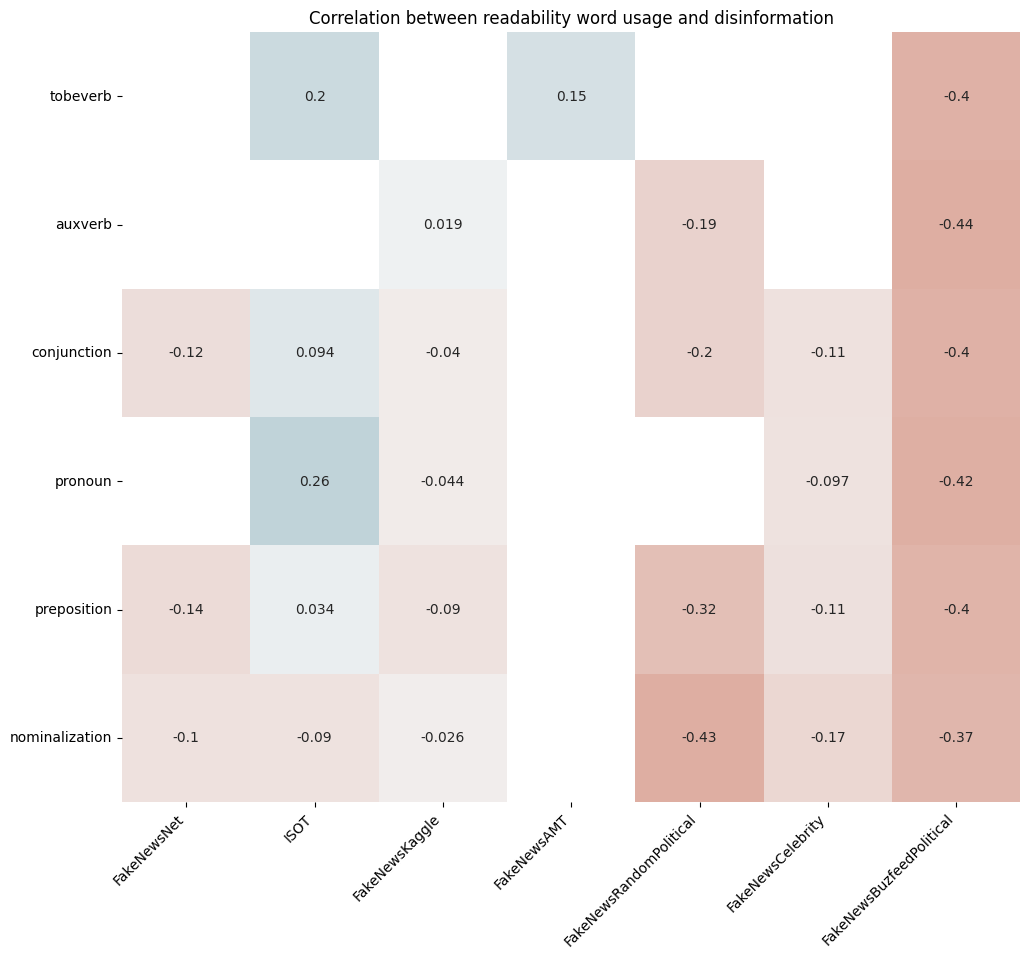

In [38]:
## plot readability word usage correlations

selected_columns = ['label'] + ['readability_tobeverb', 'readability_auxverb', 'readability_conjunction', 'readability_pronoun','readability_preposition', 'readability_nominalization']

all_corrs = pd.DataFrame()
all_masks = []

for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('readability_') for column in selected_columns if (column.startswith('readability_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)
    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
ax = sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between readability word usage and disinformation')

--- FakeNewsNet ---


readability_pronoun            readability_interrogative             \
                     mean        std                      mean        std   
label                                                                       
0               52.437811  69.730964                  7.870647  12.448019   
1               44.602339  62.919040                  5.625731   5.676602   

      readability_article            readability_subordination             \
                     mean        std                      mean        std   
label                                                                       
0               49.462687  59.855074                 10.159204  13.195246   
1               32.807018  24.407645                  7.807018   8.614841   

      readability_conjunction            readability_preposition             
                         mean        std                    mean        std  
label                                                                        
0                   19.955224  28.611064               79.442786  98.197647  
1                   14.228070  13.722910               56.444444  47.857891

--- ISOT ---


readability_pronoun            readability_interrogative            \
                     mean        std                      mean       std   
label                                                                      
0                21.82471  19.720169                  2.788849  3.252838   
1                36.50921  32.131972                  5.315153  5.041322   

      readability_article            readability_subordination            \
                     mean        std                      mean       std   
label                                                                      
0                33.29576  24.009144                  6.016016  5.261393   
1                34.72953  36.065092                  7.176982  7.321235   

      readability_conjunction            readability_preposition             
                         mean        std                    mean        std  
label                                                                        
0                   10.552111   8.875037               52.868650  37.892648  
1                   12.780845  14.038527               56.032761  53.533586

--- FakeNewsKaggle ---


readability_pronoun             readability_interrogative             \
                     mean         std                      mean        std   
label                                                                        
0               65.614308   70.932707                  9.270322   9.700393   
1               57.931090  101.704303                  7.775030  13.998313   

      readability_article            readability_subordination             \
                     mean        std                      mean        std   
label                                                                       
0               78.178896  65.506969                 14.221375  12.940179   
1               60.836779  86.333092                 12.634644  19.225251   

      readability_conjunction            readability_preposition              
                         mean        std                    mean         std  
label                                                                         
0                   27.211334  25.318823              116.544989   97.465612  
1                   24.626807  38.498187               95.544116  134.330810

--- FakeNewsAMT ---


readability_pronoun           readability_interrogative            \
                     mean       std                      mean       std   
label                                                                     
0                    7.30  5.579550                  0.991667  1.309737   
1                    7.85  4.845996                  0.779167  0.962249   

      readability_article           readability_subordination            \
                     mean       std                      mean       std   
label                                                                     
0               10.045833  4.097400                    1.9875  1.629953   
1                9.970833  4.635138                    1.8250  1.501255   

      readability_conjunction           readability_preposition            
                         mean       std                    mean       std  
label                                                                      
0                    3.375000  2.049849               16.566667  5.767073  
1                    3.429167  2.276674               15.766667  6.162694

--- FakeNewsRandomPolitical ---


readability_pronoun            readability_interrogative            \
                     mean        std                      mean       std   
label                                                                      
0               46.093333  29.728125                  6.853333  5.454216   
1               40.880000  41.386106                  5.480000  4.771424   

      readability_article            readability_subordination            \
                     mean        std                      mean       std   
label                                                                      
0               58.293333  34.893186                 12.720000  7.909215   
1               39.173333  26.344584                  7.626667  6.370908   

      readability_conjunction            readability_preposition             
                         mean        std                    mean        std  
label                                                                        
0                   19.813333  13.405015               92.200000  52.130035  
1                   14.200000  14.082767               59.973333  41.789684

--- FakeNewsCelebrity ---


readability_pronoun             readability_interrogative             \
                     mean         std                      mean        std   
label                                                                        
0                  56.892  176.809498                     6.052  14.624116   
1                  32.488   21.013714                     3.328   2.971825   

      readability_article            readability_subordination             \
                     mean        std                      mean        std   
label                                                                       
0                  37.536  70.454354                     8.584  15.916289   
1                  25.268  16.264511                     6.364   4.703189   

      readability_conjunction            readability_preposition              
                         mean        std                    mean         std  
label                                                                         
0                      17.388  40.118968                  65.736  135.101785  
1                      11.204   7.421502                  43.572   26.930463

--- FakeNewsBuzfeedPolitical ---


readability_pronoun             readability_interrogative             \
                     mean         std                      mean        std   
label                                                                        
0              133.339623  143.065201                 19.377358  26.093933   
1               35.687500   30.532965                  4.291667   4.052624   

      readability_article             readability_subordination             \
                     mean         std                      mean        std   
label                                                                        
0              103.962264  119.155355                 23.547170  25.931542   
1               29.479167   25.179348                  6.458333   6.126185   

      readability_conjunction            readability_preposition              
                         mean        std                    mean         std  
label                                                                         
0                   48.075472  57.049523               172.54717  194.342537  
1                   11.666667  11.603986                49.37500   43.855966

Text(0.5, 1.0, 'Correlation between readability sentence beginning and disinformation')

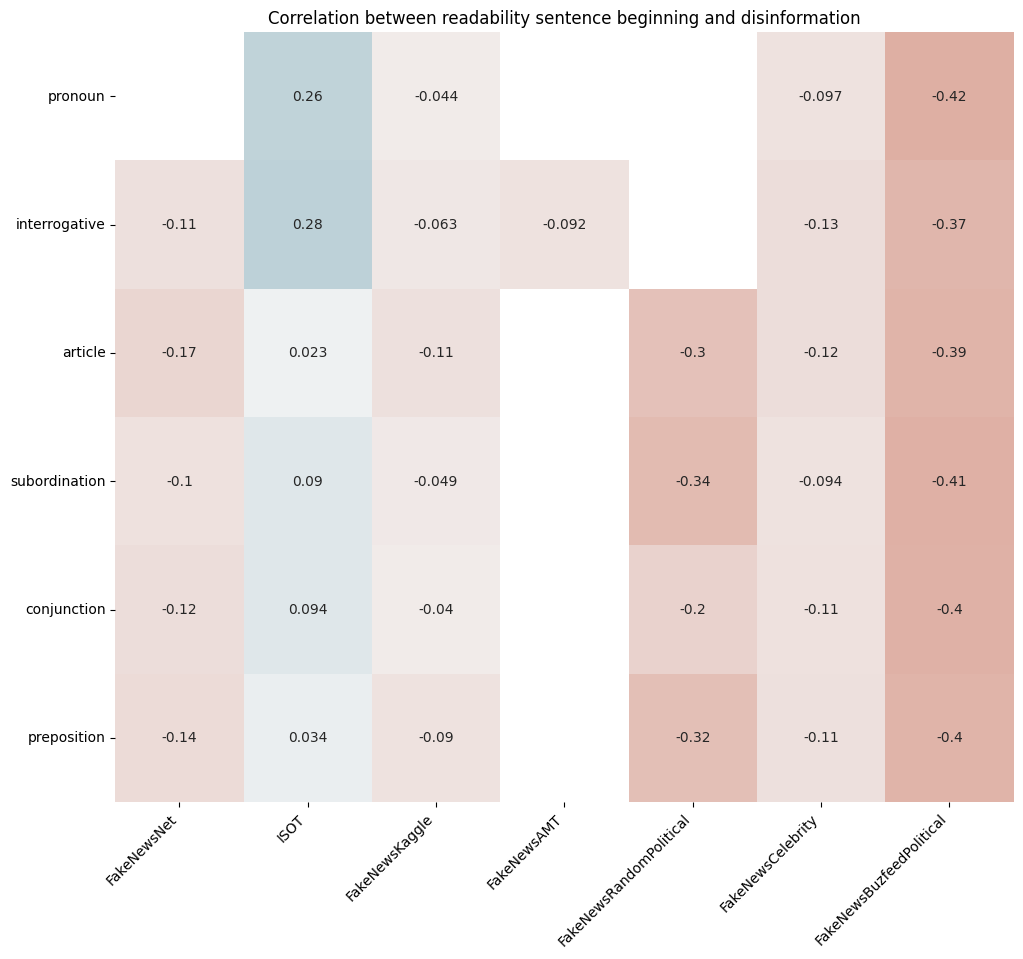

In [39]:
## plot readability sentence beginning correlations

selected_columns = ['label'] + ['readability_pronoun', 
    'readability_interrogative',
    'readability_article',
    'readability_subordination',
    'readability_conjunction',
    'readability_preposition']
all_corrs = pd.DataFrame()
all_masks = []

for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('readability_') for column in selected_columns if (column.startswith('readability_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)
    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
ax = sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between readability sentence beginning and disinformation')

--- FakeNewsNet ---


sentiment_neg           sentiment_neu           sentiment_pos            \
               mean       std          mean       std          mean       std   
label                                                                           
0          0.092303  0.051263      0.820851  0.063218      0.086856  0.039396   
1          0.102240  0.051464      0.808836  0.057328      0.088936  0.040626   

      sentiment_compound            
                    mean       std  
label                               
0              -0.044497  0.883404  
1              -0.193931  0.827783

--- ISOT ---


sentiment_neg           sentiment_neu           sentiment_pos            \
               mean       std          mean       std          mean       std   
label                                                                           
0          0.074634  0.048809      0.846056  0.056906      0.079309  0.041293   
1          0.092824  0.050345      0.818677  0.058827      0.088500  0.042891   

      sentiment_compound            
                    mean       std  
label                               
0               0.065110  0.819577  
1              -0.077743  0.862593

--- FakeNewsKaggle ---


sentiment_neg          sentiment_neu           sentiment_pos            \
               mean      std          mean       std          mean       std   
label                                                                          
0          0.075990  0.04395      0.838790  0.049259      0.085228  0.036985   
1          0.083306  0.04950      0.828514  0.060670      0.088188  0.044000   

      sentiment_compound            
                    mean       std  
label                               
0               0.165610  0.901364  
1               0.033378  0.867036

--- FakeNewsAMT ---


sentiment_neg           sentiment_neu           sentiment_pos            \
               mean       std          mean       std          mean       std   
label                                                                           
0          0.059546  0.054226      0.848900  0.069524      0.091546  0.055903   
1          0.064646  0.056833      0.837546  0.071130      0.097783  0.060252   

      sentiment_compound            
                    mean       std  
label                               
0               0.229103  0.720589  
1               0.251032  0.718479

--- FakeNewsRandomPolitical ---


sentiment_neg           sentiment_neu           sentiment_pos            \
               mean       std          mean       std          mean       std   
label                                                                           
0          0.055133  0.025325      0.852013  0.046705      0.092840  0.042136   
1          0.085240  0.050171      0.830227  0.063121      0.084467  0.042636   

      sentiment_compound            
                    mean       std  
label                               
0               0.510699  0.778791  
1               0.001427  0.866167

--- FakeNewsCelebrity ---


sentiment_neg           sentiment_neu           sentiment_pos            \
               mean       std          mean       std          mean       std   
label                                                                           
0          0.044912  0.034973      0.839112  0.058275      0.115944  0.054358   
1          0.066500  0.039290      0.831420  0.051444      0.102112  0.047295   

      sentiment_compound            
                    mean       std  
label                               
0               0.644609  0.646682  
1               0.380468  0.796901

--- FakeNewsBuzfeedPolitical ---


sentiment_neg           sentiment_neu           sentiment_pos            \
               mean       std          mean       std          mean       std   
label                                                                           
0          0.096094  0.047550      0.803170  0.063906      0.100755  0.035829   
1          0.078812  0.050621      0.836354  0.056790      0.084937  0.035034   

      sentiment_compound            
                    mean       std  
label                               
0               0.118989  0.941564  
1               0.109127  0.849828

Text(0.5, 1.0, 'Correlation between sentiment and disinformation')

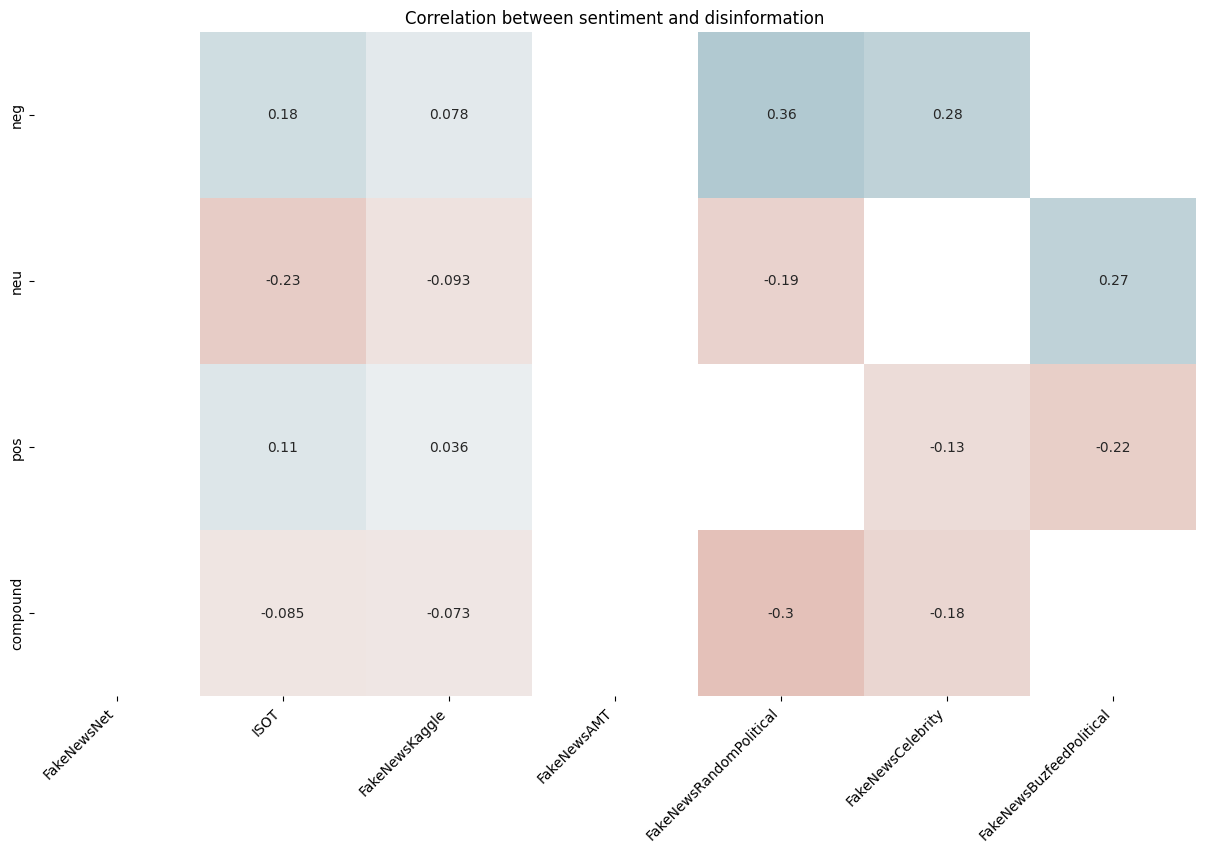

In [40]:
## plot sentiment correlations

selected_columns = ['label'] + [column for column in isot.columns if (column.startswith('sentiment_')) ]

all_corrs = pd.DataFrame()
all_masks = []

for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('sentiment_') for column in selected_columns if (column.startswith('sentiment_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)

    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
ax = sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between sentiment and disinformation')

--- FakeNewsNet ---


liwc_function           liwc_pronoun           liwc_ppron            \
               mean       std         mean       std       mean       std   
label                                                                       
0          0.438730  0.052737     0.095776  0.036378   0.050685  0.025070   
1          0.473947  0.051460     0.109594  0.033786   0.058397  0.027087   

         liwc_i             liwc_we            liwc_you           liwc_shehe  \
           mean       std      mean       std      mean       std       mean   
label                                                                          
0      0.007942  0.010002  0.006694  0.008509  0.006084  0.007519   0.022735   
1      0.007743  0.014269  0.007866  0.009033  0.007685  0.012336   0.022706   

                liwc_they           liwc_ipron           liwc_article  \
            std      mean       std       mean       std         mean   
label                                                                   
0      0.016643  0.007229  0.006816   0.045076  0.016826     0.076960   
1      0.020806  0.012397  0.012037   0.051180  0.018373     0.074321   

                liwc_prep           liwc_auxverb           liwc_adverb  \
            std      mean       std         mean       std        mean   
label                                                                    
0      0.019207  0.136071  0.020216     0.060049  0.016680    0.031497   
1      0.021366  0.139975  0.017814     0.068848  0.023194    0.038568   

                liwc_conj           liwc_negate           liwc_verb            \
            std      mean       std        mean       std      mean       std   
label                                                                           
0      0.013128  0.048046  0.012495    0.008233  0.006770  0.119371  0.024378   
1      0.016630  0.053071  0.015194    0.009259  0.006914  0.128615  0.027253   

       liwc_adj           liwc_compare           liwc_interrog            \
           mean       std         mean       std          mean       std   
label                                                                      
0      0.043440  0.016149     0.023052  0.012354      0.014433  0.007965   
1      0.042897  0.015502     0.022188  0.010797      0.014758  0.008323   

      liwc_number           liwc_quant            
             mean       std       mean       std  
label                                             
0        0.009838  0.007543   0.018904  0.009918  
1        0.008499  0.006238   0.019333  0.010229

--- ISOT ---


liwc_function           liwc_pronoun           liwc_ppron            \
               mean       std         mean       std       mean       std   
label                                                                       
0          0.397422  0.041544     0.057220  0.024527   0.025807  0.018925   
1          0.442729  0.052470     0.096023  0.034617   0.050012  0.025984   

         liwc_i             liwc_we            liwc_you           liwc_shehe  \
           mean       std      mean       std      mean       std       mean   
label                                                                          
0      0.002438  0.005371  0.004042  0.006799  0.000682  0.002405   0.013698   
1      0.006041  0.009622  0.007430  0.009187  0.005458  0.008745   0.022114   

                liwc_they           liwc_ipron           liwc_article  \
            std      mean       std       mean       std         mean   
label                                                                   
0      0.013694  0.004949  0.006049   0.031409  0.014107     0.085993   
1      0.018259  0.008970  0.009222   0.045987  0.018242     0.076444   

                liwc_prep           liwc_auxverb           liwc_adverb  \
            std      mean       std         mean       std        mean   
label                                                                    
0      0.020761  0.149506  0.021868     0.053200  0.018433    0.018261   
1      0.020608  0.138664  0.022272     0.059793  0.018865    0.035326   

                liwc_conj           liwc_negate           liwc_verb            \
            std      mean       std        mean       std      mean       std   
label                                                                           
0      0.010929  0.039568  0.013948    0.007198  0.006903  0.108371  0.027929   
1      0.016263  0.047002  0.015193    0.008263  0.006563  0.118127  0.028152   

       liwc_adj           liwc_compare           liwc_interrog            \
           mean       std         mean       std          mean       std   
label                                                                      
0      0.038389  0.016144     0.020523  0.011416      0.009569  0.006929   
1      0.041237  0.015907     0.021312  0.011148      0.014508  0.008738   

      liwc_number           liwc_quant            
             mean       std       mean       std  
label                                             
0        0.008950  0.008341   0.014863  0.010104  
1        0.008028  0.007207   0.017555  0.010097

--- FakeNewsKaggle ---


liwc_function           liwc_pronoun           liwc_ppron            \
               mean       std         mean       std       mean       std   
label                                                                       
0          0.428975  0.044799     0.081102  0.029390   0.041615  0.023335   
1          0.439184  0.061498     0.083723  0.034664   0.041381  0.025952   

         liwc_i             liwc_we            liwc_you           liwc_shehe  \
           mean       std      mean       std      mean       std       mean   
label                                                                          
0      0.006018  0.009689  0.005094  0.006894  0.004408  0.006979   0.018723   
1      0.005619  0.010666  0.008298  0.010632  0.006916  0.012630   0.012297   

                liwc_they           liwc_ipron           liwc_article  \
            std      mean       std       mean       std         mean   
label                                                                   
0      0.015546  0.007375  0.006446   0.039463  0.013953     0.084134   
1      0.014973  0.008253  0.008808   0.042323  0.018060     0.077511   

                liwc_prep           liwc_auxverb           liwc_adverb  \
            std      mean       std         mean       std        mean   
label                                                                    
0      0.017903  0.139086  0.017421     0.059173  0.016652    0.027426   
1      0.022516  0.138377  0.023651     0.066235  0.022353    0.032318   

                liwc_conj           liwc_negate           liwc_verb            \
            std      mean       std        mean       std      mean       std   
label                                                                           
0      0.011064  0.045809  0.011734    0.008957  0.005943  0.112609  0.026369   
1      0.015741  0.048748  0.016974    0.010504  0.008800  0.115438  0.032551   

       liwc_adj           liwc_compare           liwc_interrog            \
           mean       std         mean       std          mean       std   
label                                                                      
0      0.040599  0.012588     0.022219  0.008906      0.012359  0.005938   
1      0.042028  0.017336     0.021862  0.012332      0.012288  0.008405   

      liwc_number           liwc_quant            
             mean       std       mean       std  
label                                             
0        0.009235  0.006350   0.017553  0.008515  
1        0.008122  0.007415   0.018308  0.011148

--- FakeNewsAMT ---


liwc_function           liwc_pronoun           liwc_ppron            \
               mean       std         mean       std       mean       std   
label                                                                       
0          0.398489  0.055957     0.063365  0.035004   0.030308  0.029091   
1          0.430455  0.056851     0.072939  0.035442   0.037020  0.027696   

         liwc_i             liwc_we            liwc_you           liwc_shehe  \
           mean       std      mean       std      mean       std       mean   
label                                                                          
0      0.003887  0.010353  0.003521  0.007954  0.002523  0.009136   0.014437   
1      0.003200  0.009673  0.004451  0.009756  0.002184  0.006539   0.017513   

                liwc_they           liwc_ipron           liwc_article  \
            std      mean       std       mean       std         mean   
label                                                                   
0      0.020657  0.005940  0.009430   0.033057  0.019071     0.078972   
1      0.023319  0.009672  0.012105   0.035918  0.019825     0.081526   

                liwc_prep           liwc_auxverb           liwc_adverb  \
            std      mean       std         mean       std        mean   
label                                                                    
0      0.023737  0.147522  0.031274     0.053204  0.024031    0.023314   
1      0.025760  0.143545  0.029805     0.068987  0.026902    0.024479   

                liwc_conj           liwc_negate           liwc_verb            \
            std      mean       std        mean       std      mean       std   
label                                                                           
0      0.018216  0.041323  0.018057    0.006799  0.008554  0.109925  0.037832   
1      0.016016  0.043656  0.021307    0.009356  0.011494  0.125783  0.038397   

       liwc_adj           liwc_compare           liwc_interrog            \
           mean       std         mean       std          mean       std   
label                                                                      
0      0.046829  0.023574     0.025329  0.015984      0.010198  0.009966   
1      0.046357  0.022778     0.022807  0.015675      0.008785  0.008752   

      liwc_number           liwc_quant            
             mean       std       mean       std  
label                                             
0        0.011477  0.012007   0.015825  0.014246  
1        0.008573  0.010062   0.017787  0.014779

--- FakeNewsRandomPolitical ---


liwc_function           liwc_pronoun           liwc_ppron            \
               mean       std         mean       std       mean       std   
label                                                                       
0          0.409604  0.033883     0.075409  0.025165   0.037394  0.020352   
1          0.426161  0.050743     0.086743  0.036286   0.044504  0.023496   

         liwc_i             liwc_we            liwc_you           liwc_shehe  \
           mean       std      mean       std      mean       std       mean   
label                                                                          
0      0.004126  0.005218  0.005218  0.005705  0.001592  0.003271   0.019813   
1      0.005064  0.006295  0.008081  0.007830  0.004579  0.007623   0.017242   

                liwc_they           liwc_ipron           liwc_article  \
            std      mean       std       mean       std         mean   
label                                                                   
0      0.013659  0.006646  0.005863   0.038014  0.012772     0.079744   
1      0.013407  0.009538  0.009561   0.042225  0.019450     0.079357   

                liwc_prep           liwc_auxverb           liwc_adverb  \
            std      mean       std         mean       std        mean   
label                                                                    
0      0.014479  0.140698  0.015951     0.054609  0.014402    0.025690   
1      0.017003  0.133177  0.016545     0.058295  0.018969    0.033835   

                liwc_conj           liwc_negate           liwc_verb            \
            std      mean       std        mean       std      mean       std   
label                                                                           
0      0.010256  0.044549  0.008792    0.006307  0.003689  0.107683  0.019019   
1      0.013966  0.044396  0.013733    0.007228  0.005214  0.112164  0.030466   

       liwc_adj           liwc_compare           liwc_interrog            \
           mean       std         mean       std          mean       std   
label                                                                      
0      0.043278  0.014428     0.024241  0.011120      0.011529  0.004883   
1      0.041296  0.011233     0.020017  0.008328      0.012820  0.006216   

      liwc_number           liwc_quant            
             mean       std       mean       std  
label                                             
0        0.009709  0.007752    0.01659  0.008773  
1        0.009790  0.008410    0.01749  0.008105

--- FakeNewsCelebrity ---


liwc_function           liwc_pronoun           liwc_ppron            \
               mean       std         mean       std       mean       std   
label                                                                       
0          0.457518  0.060376     0.105243  0.037592   0.066913  0.028243   
1          0.467296  0.047738     0.101445  0.028224   0.065441  0.023921   

         liwc_i             liwc_we            liwc_you           liwc_shehe  \
           mean       std      mean       std      mean       std       mean   
label                                                                          
0      0.013703  0.016174  0.005698  0.008001  0.005462  0.007980   0.032360   
1      0.005322  0.010061  0.004019  0.005903  0.003477  0.005123   0.042987   

                liwc_they           liwc_ipron           liwc_article  \
            std      mean       std       mean       std         mean   
label                                                                   
0      0.016984  0.009689  0.009782   0.038292  0.016909     0.071581   
1      0.021682  0.009635  0.010115   0.035968  0.014603     0.071358   

                liwc_prep           liwc_auxverb           liwc_adverb  \
            std      mean       std         mean       std        mean   
label                                                                    
0      0.016059  0.134373  0.020742     0.066914  0.022261    0.037684   
1      0.019614  0.132056  0.021787     0.078344  0.020216    0.040525   

                liwc_conj           liwc_negate           liwc_verb            \
            std      mean       std        mean       std      mean       std   
label                                                                           
0      0.017008  0.052070  0.013950    0.010840  0.008778  0.130873  0.032203   
1      0.015790  0.050889  0.014589    0.012183  0.007732  0.143321  0.028352   

       liwc_adj           liwc_compare           liwc_interrog            \
           mean       std         mean       std          mean       std   
label                                                                      
0      0.043209  0.014616     0.023070  0.009884      0.012524  0.007487   
1      0.044185  0.015005     0.023072  0.011006      0.010992  0.006727   

      liwc_number           liwc_quant            
             mean       std       mean       std  
label                                             
0        0.009709  0.007292   0.017589  0.009206  
1        0.008380  0.006965   0.017858  0.009967

--- FakeNewsBuzfeedPolitical ---


liwc_function           liwc_pronoun           liwc_ppron            \
               mean       std         mean       std       mean       std   
label                                                                       
0          0.464206  0.055855     0.106812  0.031450   0.061553  0.025392   
1          0.437459  0.046852     0.098428  0.031958   0.057883  0.026957   

         liwc_i             liwc_we            liwc_you           liwc_shehe  \
           mean       std      mean       std      mean       std       mean   
label                                                                          
0      0.011339  0.012007  0.008340  0.006386  0.007278  0.010797   0.024969   
1      0.013505  0.017938  0.008266  0.009953  0.004010  0.004434   0.025858   

                liwc_they           liwc_ipron           liwc_article  \
            std      mean       std       mean       std         mean   
label                                                                   
0      0.016035  0.009627  0.007384   0.045231  0.013970     0.072028   
1      0.015738  0.006244  0.007569   0.040545  0.015518     0.071547   

                liwc_prep           liwc_auxverb           liwc_adverb  \
            std      mean       std         mean       std        mean   
label                                                                    
0      0.012286  0.128602  0.014264     0.072913  0.015700    0.034483   
1      0.016775  0.130467  0.024533     0.067801  0.015463    0.028960   

                liwc_conj           liwc_negate           liwc_verb            \
            std      mean       std        mean       std      mean       std   
label                                                                           
0      0.010187  0.054215  0.011730    0.015532  0.006501  0.127294  0.025826   
1      0.014100  0.045821  0.013568    0.011126  0.005447  0.131616  0.030158   

       liwc_adj           liwc_compare           liwc_interrog            \
           mean       std         mean       std          mean       std   
label                                                                      
0      0.046842  0.012053     0.025170  0.009436      0.015160  0.006457   
1      0.041709  0.016895     0.021476  0.008666      0.012369  0.007004   

      liwc_number           liwc_quant            
             mean       std       mean       std  
label                                             
0        0.008244  0.004404   0.018888  0.008891  
1        0.007365  0.006896   0.015331  0.006593

Text(0.5, 1.0, 'Correlation between liwc linguistic and disinformation')

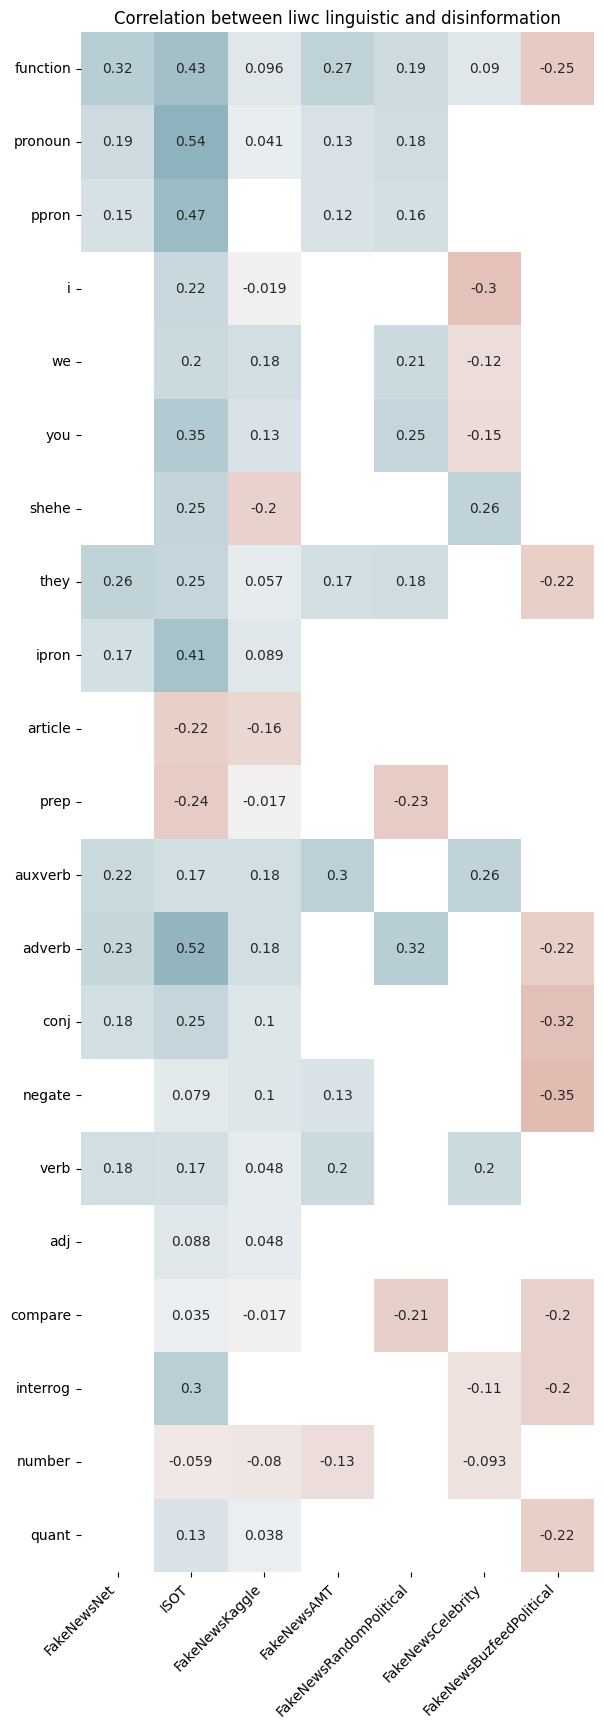

In [41]:
## plot liwc linguistic correlations

selected_columns = ['label'] + ['liwc_function',
 'liwc_pronoun',
 'liwc_ppron',
 'liwc_i',
 'liwc_we',
 'liwc_you',
 'liwc_shehe',
 'liwc_they',
 'liwc_ipron',
 'liwc_article',
 'liwc_prep',
 'liwc_auxverb',
 'liwc_adverb',
 'liwc_conj',
 'liwc_negate',
 'liwc_verb',
 'liwc_adj',
 'liwc_compare',
 'liwc_interrog',
 'liwc_number',
 'liwc_quant']

all_corrs = pd.DataFrame()
all_masks = []
fig, ax = plt.subplots(figsize=(10,20))         # Sample figsize in inches
for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('liwc_') for column in selected_columns if (column.startswith('liwc_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)

    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
        ax=ax
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between liwc linguistic and disinformation')

--- FakeNewsNet ---


liwc_affect           liwc_posemo           liwc_negemo            \
             mean       std        mean       std        mean       std   
label                                                                     
0        0.045898  0.018667    0.022694  0.012881    0.022712  0.015023   
1        0.049051  0.019716    0.023961  0.015059    0.024423  0.014835   

       liwc_anx           liwc_anger            liwc_sad            
           mean       std       mean       std      mean       std  
label                                                               
0      0.003724  0.005627   0.009683  0.009104  0.003193  0.004356  
1      0.003957  0.006789   0.009560  0.008644  0.003430  0.004905

--- ISOT ---


liwc_affect           liwc_posemo           liwc_negemo            \
             mean       std        mean       std        mean       std   
label                                                                     
0        0.038718  0.018162    0.020354  0.013498    0.017836  0.013884   
1        0.047618  0.019999    0.023794  0.014367    0.023202  0.015060   

       liwc_anx           liwc_anger            liwc_sad            
           mean       std       mean       std      mean       std  
label                                                               
0      0.003267  0.004788   0.007420  0.009406  0.002678  0.004261  
1      0.003641  0.005076   0.009997  0.009819  0.002976  0.004540

--- FakeNewsKaggle ---


liwc_affect           liwc_posemo           liwc_negemo            \
             mean       std        mean       std        mean       std   
label                                                                     
0        0.038654  0.014725    0.020465  0.010874    0.017611  0.011749   
1        0.043648  0.019648    0.022852  0.014317    0.020187  0.014457   

      liwc_anx           liwc_anger            liwc_sad            
          mean       std       mean       std      mean       std  
label                                                              
0      0.00308  0.003749   0.007011  0.007680  0.002621  0.003041  
1      0.00330  0.005109   0.008408  0.009672  0.002788  0.004727

--- FakeNewsAMT ---


liwc_affect           liwc_posemo           liwc_negemo            \
             mean       std        mean       std        mean       std   
label                                                                     
0        0.039862  0.023914    0.025628  0.019685    0.013572  0.015441   
1        0.042952  0.023725    0.029344  0.020711    0.012990  0.014801   

       liwc_anx           liwc_anger            liwc_sad            
           mean       std       mean       std      mean       std  
label                                                               
0      0.002383  0.006038   0.004360  0.008566  0.003339  0.006656  
1      0.001890  0.004582   0.003933  0.007445  0.003320  0.007264

--- FakeNewsRandomPolitical ---


liwc_affect           liwc_posemo           liwc_negemo            \
             mean       std        mean       std        mean       std   
label                                                                     
0        0.038238  0.015139    0.024597  0.013321    0.012968  0.007387   
1        0.042731  0.021808    0.021295  0.014330    0.020905  0.016335   

       liwc_anx           liwc_anger            liwc_sad            
           mean       std       mean       std      mean       std  
label                                                               
0      0.002371  0.002335   0.004599  0.003917  0.002245  0.002447  
1      0.003233  0.004465   0.008569  0.010364  0.003187  0.003689

--- FakeNewsCelebrity ---


liwc_affect           liwc_posemo           liwc_negemo            \
             mean       std        mean       std        mean       std   
label                                                                     
0        0.042699  0.018781    0.030938  0.017261    0.011173  0.010591   
1        0.043927  0.016192    0.025657  0.013722    0.017540  0.011983   

       liwc_anx           liwc_anger            liwc_sad            
           mean       std       mean       std      mean       std  
label                                                               
0      0.002004  0.003626   0.003321  0.005036  0.002363  0.004056  
1      0.003901  0.005086   0.005095  0.006219  0.003049  0.004520

--- FakeNewsBuzfeedPolitical ---


liwc_affect           liwc_posemo           liwc_negemo           \
             mean       std        mean       std        mean      std   
label                                                                    
0        0.048594  0.018161    0.025860  0.010887    0.022118  0.01291   
1        0.037645  0.014183    0.021111  0.009288    0.015945  0.01289   

       liwc_anx           liwc_anger            liwc_sad            
           mean       std       mean       std      mean       std  
label                                                               
0      0.003719  0.004242   0.009598  0.007335  0.003094  0.003845  
1      0.002439  0.003342   0.005739  0.005822  0.002204  0.002654

Text(0.5, 1.0, 'Correlation between liwc affective processes and disinformation')

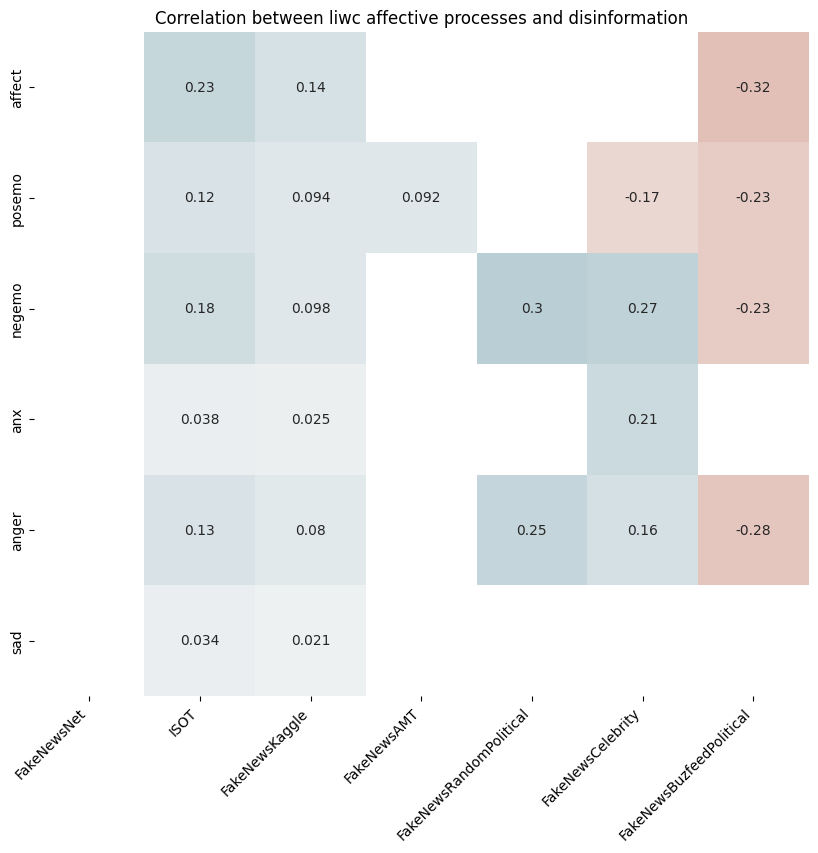

In [42]:
## plot liwc affective processes correlations

selected_columns = ['label'] + ['liwc_affect',
 'liwc_posemo',
 'liwc_negemo',
 'liwc_anx',
 'liwc_anger',
 'liwc_sad',]
all_corrs = pd.DataFrame()
all_masks = []
fig, ax = plt.subplots(figsize=(10,20))         # Sample figsize in inches
for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('liwc_') for column in selected_columns if (column.startswith('liwc_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)

    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
        ax=ax
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between liwc affective processes and disinformation')

--- FakeNewsNet ---


liwc_social           liwc_family           liwc_friend            \
             mean       std        mean       std        mean       std   
label                                                                     
0        0.101174  0.034064    0.002581  0.004648    0.001882  0.003936   
1        0.103073  0.031412    0.003394  0.006246    0.001700  0.002990   

      liwc_female           liwc_male            
             mean       std      mean       std  
label                                            
0        0.008023  0.013605  0.019944  0.015143  
1        0.008816  0.015870  0.019169  0.020316

--- ISOT ---


liwc_social           liwc_family           liwc_friend            \
             mean       std        mean       std        mean       std   
label                                                                     
0        0.082620  0.030118    0.001360  0.003913    0.001368  0.002952   
1        0.098909  0.034770    0.002859  0.006201    0.001849  0.003602   

      liwc_female           liwc_male            
             mean       std      mean       std  
label                                            
0        0.003160  0.007780  0.012601  0.013271  
1        0.008456  0.014554  0.019183  0.017515

--- FakeNewsKaggle ---


liwc_social           liwc_family           liwc_friend            \
             mean       std        mean       std        mean       std   
label                                                                     
0        0.087485  0.029938    0.002675  0.005005    0.001667  0.002558   
1        0.081100  0.036220    0.001960  0.005160    0.001477  0.003052   

      liwc_female           liwc_male            
             mean       std      mean       std  
label                                            
0        0.006826  0.012003  0.016105  0.014609  
1        0.006062  0.012076  0.010013  0.013353

--- FakeNewsAMT ---


liwc_social           liwc_family           liwc_friend            \
             mean       std        mean       std        mean       std   
label                                                                     
0        0.074422  0.042675    0.002126  0.006799    0.001341  0.003722   
1        0.085293  0.044421    0.002876  0.007857    0.002171  0.004829   

      liwc_female           liwc_male            
             mean       std      mean       std  
label                                            
0        0.008533  0.018273  0.009608  0.016622  
1        0.009387  0.020865  0.013126  0.020115

--- FakeNewsRandomPolitical ---


liwc_social           liwc_family           liwc_friend            \
             mean       std        mean       std        mean       std   
label                                                                     
0        0.089893  0.028592    0.002085  0.004920    0.000875  0.001193   
1        0.086067  0.030494    0.002387  0.004413    0.000958  0.002011   

      liwc_female           liwc_male            
             mean       std      mean       std  
label                                            
0        0.003594  0.009585  0.018826  0.013339  
1        0.006381  0.011237  0.014332  0.012538

--- FakeNewsCelebrity ---


liwc_social           liwc_family           liwc_friend            \
             mean       std        mean       std        mean       std   
label                                                                     
0        0.122507  0.037333    0.011178  0.014156    0.004687  0.005451   
1        0.126492  0.032123    0.011800  0.013398    0.005444  0.006229   

      liwc_female           liwc_male            
             mean       std      mean       std  
label                                            
0        0.026528  0.020260  0.017215  0.017428  
1        0.033215  0.024212  0.020963  0.021061

--- FakeNewsBuzfeedPolitical ---


liwc_social           liwc_family           liwc_friend            \
             mean       std        mean       std        mean       std   
label                                                                     
0        0.103793  0.026778    0.002508  0.003401    0.001699  0.001909   
1        0.097076  0.032263    0.002658  0.003987    0.002028  0.003001   

      liwc_female           liwc_male            
             mean       std      mean       std  
label                                            
0        0.009365  0.012780  0.021403  0.016604  
1        0.010456  0.013304  0.020376  0.015035

Text(0.5, 1.0, 'Correlation between liwc social processes and disinformation')

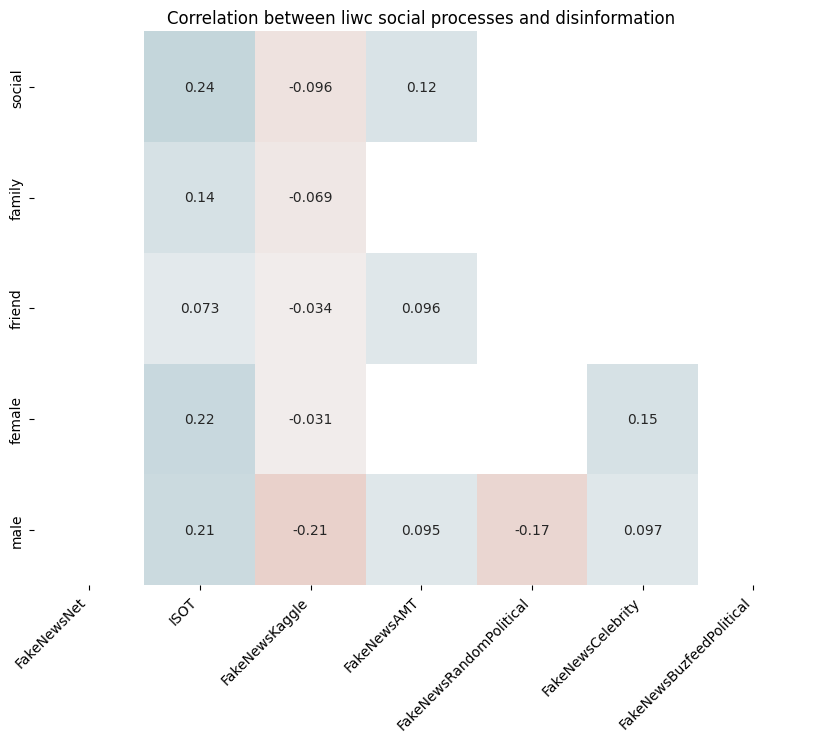

In [43]:
## plot liwc social processes correlations

selected_columns = ['label'] + ['liwc_social',
 'liwc_family',
 'liwc_friend',
 'liwc_female',
 'liwc_male',]
all_corrs = pd.DataFrame()
all_masks = []
fig, ax = plt.subplots(figsize=(10,20))         # Sample figsize in inches
for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('liwc_') for column in selected_columns if (column.startswith('liwc_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)
    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
        ax=ax
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between liwc social processes and disinformation')

--- FakeNewsNet ---


liwc_cogproc           liwc_insight           liwc_cause            \
              mean       std         mean       std       mean       std   
label                                                                      
0         0.083536  0.028227     0.016812  0.009951   0.014080  0.008439   
1         0.096514  0.030810     0.020031  0.010006   0.016086  0.009209   

      liwc_discrep           liwc_tentat           liwc_certain            \
              mean       std        mean       std         mean       std   
label                                                                       
0         0.010957  0.007671    0.017668  0.009449     0.012025  0.008394   
1         0.013164  0.009256    0.021851  0.012196     0.014632  0.007647   

      liwc_differ            
             mean       std  
label                        
0        0.021269  0.010407  
1        0.024022  0.012860

--- ISOT ---


liwc_cogproc           liwc_insight           liwc_cause            \
              mean       std         mean       std       mean       std   
label                                                                      
0         0.070401  0.025968     0.014068  0.010445   0.014147  0.009861   
1         0.085164  0.028820     0.017763  0.010835   0.014782  0.009349   

      liwc_discrep           liwc_tentat           liwc_certain            \
              mean       std        mean       std         mean       std   
label                                                                       
0         0.011434  0.009943    0.013413  0.010002     0.005805  0.006273   
1         0.011079  0.008926    0.018432  0.011267     0.012311  0.009020   

      liwc_differ            
             mean       std  
label                        
0        0.018396  0.011337  
1        0.021069  0.011440

--- FakeNewsKaggle ---


liwc_cogproc           liwc_insight           liwc_cause            \
              mean       std         mean       std       mean       std   
label                                                                      
0         0.077135  0.024557     0.015809  0.008297   0.013254  0.007060   
1         0.089834  0.032043     0.018781  0.011778   0.016646  0.010764   

      liwc_discrep           liwc_tentat           liwc_certain            \
              mean       std        mean       std         mean       std   
label                                                                       
0         0.009754  0.006733    0.016765  0.008991     0.007991  0.005476   
1         0.010616  0.008898    0.019020  0.012443     0.011556  0.008775   

      liwc_differ            
             mean       std  
label                        
0        0.022217  0.010194  
1        0.024300  0.013873

--- FakeNewsAMT ---


liwc_cogproc           liwc_insight           liwc_cause            \
              mean       std         mean       std       mean       std   
label                                                                      
0         0.069543  0.033891     0.015524  0.014541   0.014796  0.013598   
1         0.079044  0.032993     0.018942  0.016616   0.014716  0.012399   

      liwc_discrep           liwc_tentat           liwc_certain            \
              mean       std        mean       std         mean       std   
label                                                                       
0         0.008532  0.010102    0.013140  0.012725     0.007397  0.009270   
1         0.011122  0.011477    0.014212  0.013412     0.008945  0.009132   

      liwc_differ            
             mean       std  
label                        
0        0.016616  0.013928  
1        0.019527  0.016712

--- FakeNewsRandomPolitical ---


liwc_cogproc           liwc_insight           liwc_cause            \
              mean       std         mean       std       mean       std   
label                                                                      
0         0.077860  0.021491     0.016952  0.008718   0.014187  0.007075   
1         0.083243  0.024762     0.018081  0.010872   0.014298  0.007692   

      liwc_discrep           liwc_tentat           liwc_certain            \
              mean       std        mean       std         mean       std   
label                                                                       
0         0.011204  0.006444    0.015881  0.008966     0.008357  0.004530   
1         0.010569  0.007307    0.017070  0.009006     0.012661  0.007858   

      liwc_differ            
             mean       std  
label                        
0        0.019976  0.008435  
1        0.020671  0.010045

--- FakeNewsCelebrity ---


liwc_cogproc           liwc_insight           liwc_cause            \
              mean       std         mean       std       mean       std   
label                                                                      
0         0.077592  0.033738     0.015665  0.010760   0.011772  0.007745   
1         0.093219  0.027534     0.018665  0.010283   0.015264  0.008030   

      liwc_discrep           liwc_tentat           liwc_certain            \
              mean       std        mean       std         mean       std   
label                                                                       
0         0.008537  0.007463    0.015664  0.010746     0.009854  0.007482   
1         0.011532  0.008879    0.017646  0.011110     0.011313  0.007768   

      liwc_differ            
             mean       std  
label                        
0        0.022814  0.014479  
1        0.026923  0.012829

--- FakeNewsBuzfeedPolitical ---


liwc_cogproc           liwc_insight           liwc_cause            \
              mean       std         mean       std       mean       std   
label                                                                      
0         0.105573  0.023348     0.020492  0.007823   0.016695  0.007420   
1         0.089987  0.029013     0.022518  0.010895   0.014055  0.009631   

      liwc_discrep           liwc_tentat           liwc_certain            \
              mean       std        mean       std         mean       std   
label                                                                       
0         0.013957  0.007806    0.021571  0.010520     0.013027  0.005371   
1         0.012263  0.009833    0.016366  0.009829     0.011161  0.008176   

      liwc_differ            
             mean       std  
label                        
0        0.033598  0.012539  
1        0.022731  0.010638

Text(0.5, 1.0, 'Correlation between liwc cognitive processes and disinformation')

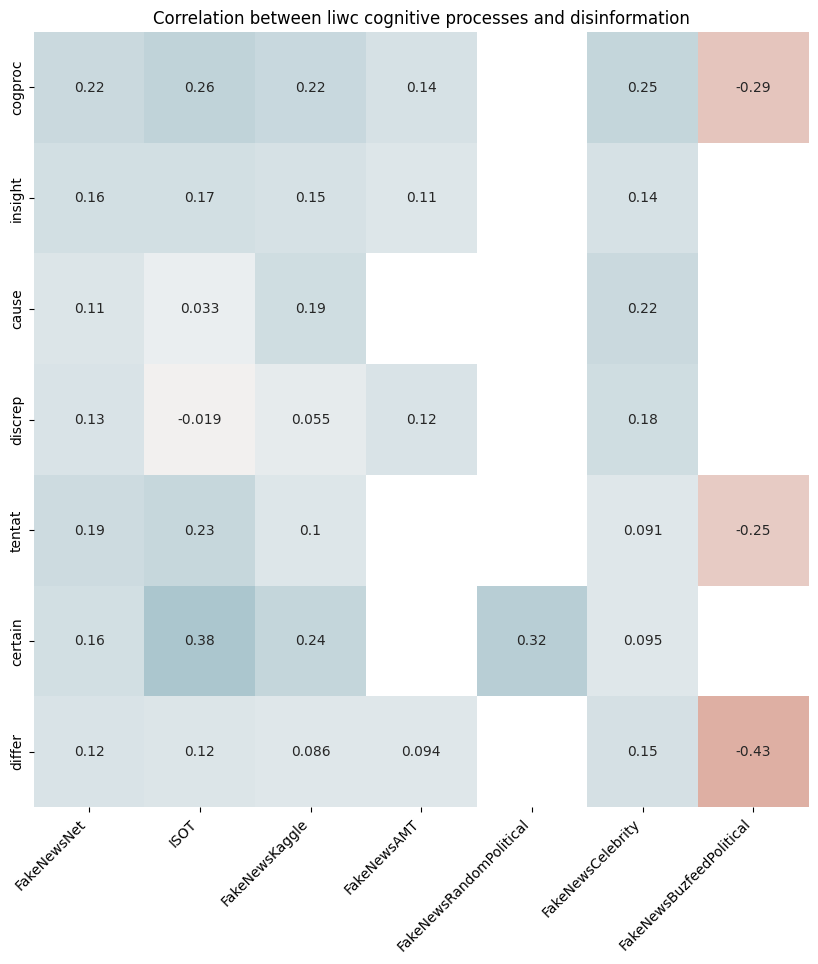

In [44]:
## plot liwc cognitive processes correlations

selected_columns = ['label'] + [ 'liwc_cogproc',
 'liwc_insight',
 'liwc_cause',
 'liwc_discrep',
 'liwc_tentat',
 'liwc_certain',
 'liwc_differ',]

all_corrs = pd.DataFrame()
all_masks = []
fig, ax = plt.subplots(figsize=(10,20))         # Sample figsize in inches
for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('liwc_') for column in selected_columns if (column.startswith('liwc_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)

    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
        ax=ax
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between liwc cognitive processes and disinformation')

--- FakeNewsNet ---


liwc_percept            liwc_see           liwc_hear            \
              mean       std      mean       std      mean       std   
label                                                                  
0         0.026270  0.012678  0.010829  0.008820  0.011873  0.008474   
1         0.021391  0.012421  0.010383  0.009982  0.007060  0.006494   

      liwc_feel            
           mean       std  
label                      
0      0.002748  0.003458  
1      0.003113  0.004384

--- ISOT ---


liwc_percept            liwc_see           liwc_hear            \
              mean       std      mean       std      mean       std   
label                                                                  
0         0.027378  0.014021  0.005855  0.007050  0.019096  0.011170   
1         0.026336  0.015353  0.012863  0.010975  0.009871  0.009034   

      liwc_feel            
           mean       std  
label                      
0      0.001861  0.003385  
1      0.003021  0.004631

--- FakeNewsKaggle ---


liwc_percept            liwc_see           liwc_hear            \
              mean       std      mean       std      mean       std   
label                                                                  
0         0.024351  0.011784  0.008507  0.007496  0.012194  0.007958   
1         0.020271  0.015005  0.009741  0.010946  0.006491  0.007838   

      liwc_feel            
           mean       std  
label                      
0      0.002858  0.003553  
1      0.002840  0.004729

--- FakeNewsAMT ---


liwc_percept            liwc_see           liwc_hear            \
              mean       std      mean       std      mean       std   
label                                                                  
0         0.027454  0.023708  0.010123  0.014103  0.012683  0.014644   
1         0.023462  0.021544  0.009238  0.013657  0.009430  0.012848   

      liwc_feel            
           mean       std  
label                      
0      0.003575  0.007624  
1      0.003298  0.006234

--- FakeNewsRandomPolitical ---


liwc_percept            liwc_see           liwc_hear            \
              mean       std      mean       std      mean       std   
label                                                                  
0         0.023209  0.008598  0.006484  0.005333  0.013135  0.005581   
1         0.020675  0.012503  0.010781  0.010751  0.006980  0.005546   

      liwc_feel            
           mean       std  
label                      
0      0.002467  0.003106  
1      0.002236  0.002640

--- FakeNewsCelebrity ---


liwc_percept            liwc_see           liwc_hear            \
              mean       std      mean       std      mean       std   
label                                                                  
0         0.032729  0.017594  0.016040  0.012250  0.011689  0.010323   
1         0.028889  0.014444  0.013859  0.010596  0.009241  0.009158   

      liwc_feel            
           mean       std  
label                      
0      0.004015  0.005130  
1      0.004727  0.005611

--- FakeNewsBuzfeedPolitical ---


liwc_percept            liwc_see           liwc_hear          liwc_feel  \
              mean       std      mean       std      mean      std      mean   
label                                                                           
0         0.023818  0.012833  0.009834  0.008421  0.010635  0.01094  0.002699   
1         0.024203  0.014530  0.011147  0.010684  0.009264  0.00780  0.003191   

                 
            std  
label            
0      0.002587  
1      0.003524

Text(0.5, 1.0, 'Correlation between liwc perceptual processes and disinformation')

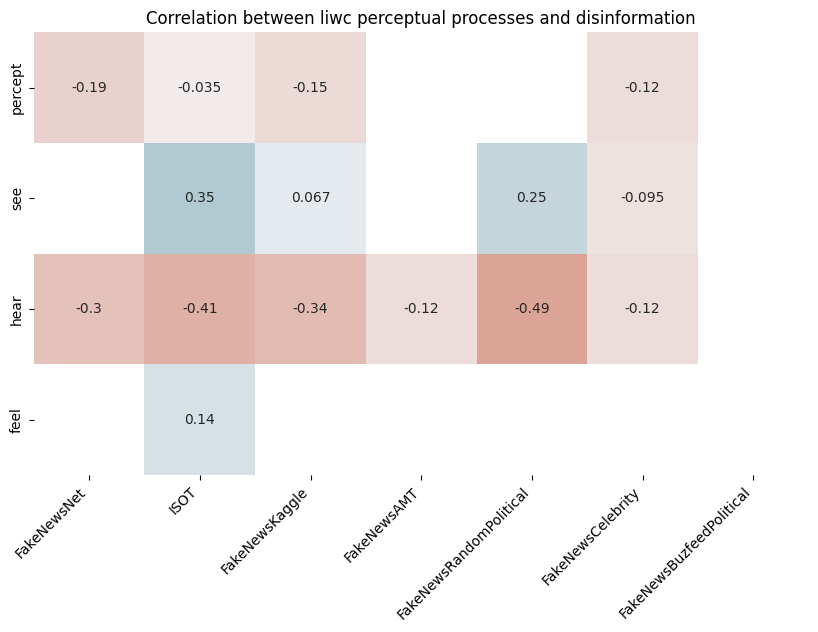

In [45]:
## plot liwc perceptual processes correlations

selected_columns = ['label'] + [  'liwc_percept',
 'liwc_see',
 'liwc_hear', 'liwc_feel']
all_corrs = pd.DataFrame()
all_masks = []
fig, ax = plt.subplots(figsize=(10,20))         # Sample figsize in inches
for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('liwc_') for column in selected_columns if (column.startswith('liwc_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)

    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
        ax=ax
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between liwc perceptual processes and disinformation')

--- FakeNewsNet ---


liwc_bio           liwc_body           liwc_health            \
           mean       std      mean       std        mean       std   
label                                                                 
0      0.009729  0.009124  0.003604  0.005271    0.003663  0.004790   
1      0.016988  0.017011  0.004676  0.005724    0.008562  0.013507   

      liwc_sexual           liwc_ingest            
             mean       std        mean       std  
label                                              
0        0.000746  0.002512    0.001898  0.003419  
1        0.002288  0.006126    0.002946  0.005791

--- ISOT ---


liwc_bio           liwc_body           liwc_health            \
           mean       std      mean       std        mean       std   
label                                                                 
0      0.006880  0.009432  0.001995  0.003806    0.003397  0.007138   
1      0.010746  0.011662  0.003358  0.005190    0.004022  0.006840   

      liwc_sexual           liwc_ingest            
             mean       std        mean       std  
label                                              
0        0.000598  0.002721    0.001202  0.003487  
1        0.001516  0.004524    0.001869  0.004979

--- FakeNewsKaggle ---


liwc_bio           liwc_body           liwc_health            \
           mean       std      mean       std        mean       std   
label                                                                 
0      0.011544  0.012773  0.003141  0.004760    0.005012  0.007907   
1      0.013749  0.019798  0.003781  0.007241    0.006017  0.011773   

      liwc_sexual           liwc_ingest            
             mean       std        mean       std  
label                                              
0        0.001069  0.003359    0.002695  0.006791  
1        0.001190  0.003794    0.003287  0.009384

--- FakeNewsAMT ---


liwc_bio           liwc_body           liwc_health            \
           mean       std      mean       std        mean       std   
label                                                                 
0      0.012370  0.017015  0.004071  0.008708    0.005124  0.010003   
1      0.013975  0.018451  0.004895  0.009941    0.005119  0.009061   

      liwc_sexual           liwc_ingest            
             mean       std        mean       std  
label                                              
0        0.000701  0.003300    0.002938  0.009720  
1        0.001254  0.005091    0.003315  0.011241

--- FakeNewsRandomPolitical ---


liwc_bio           liwc_body           liwc_health            \
           mean       std      mean       std        mean       std   
label                                                                 
0      0.007125  0.007603  0.001994  0.002266    0.003531  0.006636   
1      0.008990  0.007263  0.003329  0.003731    0.003053  0.004584   

      liwc_sexual           liwc_ingest            
             mean       std        mean       std  
label                                              
0        0.000385  0.000977    0.001419  0.002858  
1        0.001164  0.002844    0.001823  0.004073

--- FakeNewsCelebrity ---


liwc_bio           liwc_body           liwc_health            \
           mean       std      mean       std        mean       std   
label                                                                 
0      0.018425  0.016570  0.006058  0.008180    0.006294  0.009263   
1      0.018612  0.016513  0.005521  0.007808    0.007468  0.010766   

      liwc_sexual           liwc_ingest            
             mean       std        mean       std  
label                                              
0        0.002121  0.006114    0.003869  0.008386  
1        0.002648  0.005683    0.003131  0.006220

--- FakeNewsBuzfeedPolitical ---


liwc_bio           liwc_body           liwc_health            \
           mean       std      mean       std        mean       std   
label                                                                 
0      0.008961  0.007127  0.002744  0.003313    0.002518  0.002294   
1      0.010313  0.011516  0.004274  0.006053    0.003462  0.006600   

      liwc_sexual           liwc_ingest            
             mean       std        mean       std  
label                                              
0        0.002317  0.004730    0.001537  0.003424  
1        0.001698  0.004081    0.001182  0.002249

Text(0.5, 1.0, 'Correlation between liwc biological processes and disinformation')

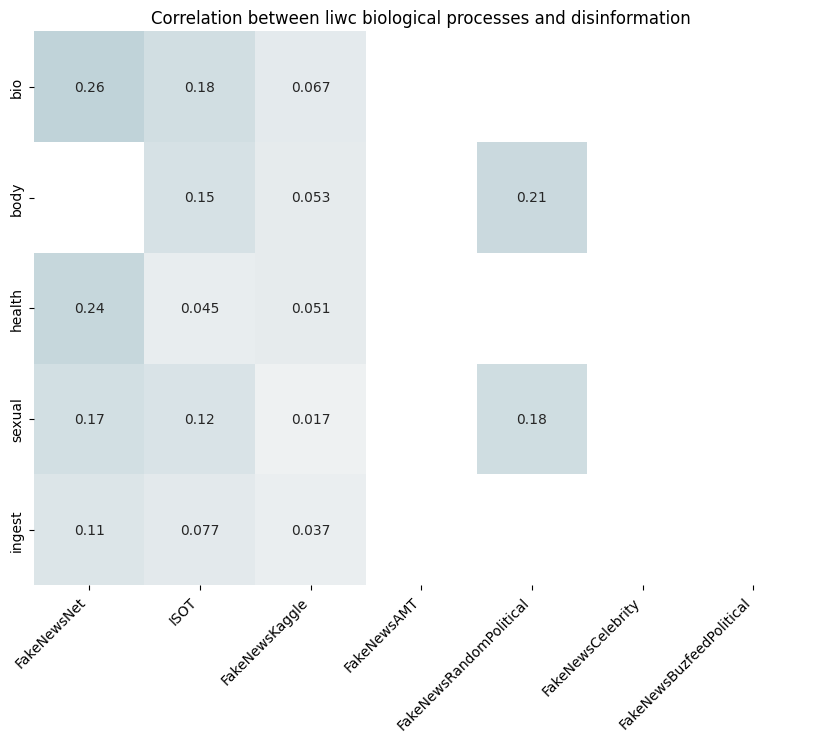

In [46]:
## plot liwc biological processes correlations

selected_columns = ['label'] + ['liwc_bio',
 'liwc_body',
 'liwc_health',
 'liwc_sexual',
 'liwc_ingest',]

all_corrs = pd.DataFrame()
all_masks = []
fig, ax = plt.subplots(figsize=(10,20))         # Sample figsize in inches
for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('liwc_') for column in selected_columns if (column.startswith('liwc_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)

    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
        ax=ax
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between liwc biological processes and disinformation')

--- FakeNewsNet ---


liwc_drives           liwc_affiliation           liwc_achiev            \
             mean       std             mean       std        mean       std   
label                                                                          
0        0.086893  0.022187         0.017999  0.012899    0.015065  0.008895   
1        0.085127  0.025893         0.019332  0.013207    0.013579  0.008920   

      liwc_power           liwc_reward           liwc_risk            
            mean       std        mean       std      mean       std  
label                                                                 
0       0.045025  0.016874    0.010206  0.007477  0.007517  0.006941  
1       0.042394  0.018613    0.011187  0.007658  0.006590  0.006049

--- ISOT ---


liwc_drives           liwc_affiliation           liwc_achiev            \
             mean       std             mean       std        mean       std   
label                                                                          
0        0.096377  0.027928         0.017232  0.013384    0.016286  0.011027   
1        0.083868  0.026300         0.019810  0.014604    0.013339  0.009729   

      liwc_power           liwc_reward           liwc_risk            
            mean       std        mean       std      mean       std  
label                                                                 
0       0.057630  0.022502    0.007325  0.007162  0.007933  0.008207  
1       0.042973  0.019378    0.009767  0.007883  0.006737  0.007074

--- FakeNewsKaggle ---


liwc_drives           liwc_affiliation           liwc_achiev            \
             mean       std             mean       std        mean       std   
label                                                                          
0        0.080512  0.023434         0.018416  0.012003    0.015070  0.009030   
1        0.079490  0.028200         0.019472  0.016272    0.013685  0.010305   

      liwc_power           liwc_reward           liwc_risk            
            mean       std        mean       std      mean       std  
label                                                                 
0       0.040939  0.018307    0.008873  0.006369  0.006417  0.005602  
1       0.039138  0.019589    0.009403  0.008171  0.006675  0.007121

--- FakeNewsAMT ---


liwc_drives           liwc_affiliation           liwc_achiev            \
             mean       std             mean       std        mean       std   
label                                                                          
0        0.088237  0.037828         0.017670  0.018161    0.020839  0.019709   
1        0.090463  0.038575         0.020335  0.019583    0.021179  0.020662   

      liwc_power           liwc_reward           liwc_risk            
            mean       std        mean       std      mean       std  
label                                                                 
0       0.045986  0.031439    0.010896  0.012733  0.006128  0.009432  
1       0.042690  0.029324    0.013574  0.013640  0.005767  0.008863

--- FakeNewsRandomPolitical ---


liwc_drives           liwc_affiliation           liwc_achiev            \
             mean       std             mean       std        mean       std   
label                                                                          
0        0.090849  0.022939         0.019239  0.009848    0.018448  0.010498   
1        0.081917  0.024040         0.017993  0.011000    0.015354  0.011111   

      liwc_power           liwc_reward           liwc_risk            
            mean       std        mean       std      mean       std  
label                                                                 
0       0.047901  0.015799    0.009778  0.006702  0.007145  0.005561  
1       0.042208  0.015916    0.009816  0.008976  0.006673  0.006097

--- FakeNewsCelebrity ---


liwc_drives           liwc_affiliation           liwc_achiev            \
             mean       std             mean       std        mean       std   
label                                                                          
0        0.070605  0.023447         0.030246  0.019818    0.012243  0.010289   
1        0.073326  0.021217         0.027700  0.016617    0.012323  0.009191   

      liwc_power           liwc_reward           liwc_risk            
            mean       std        mean       std      mean       std  
label                                                                 
0       0.021980  0.012255    0.011924  0.009335  0.002523  0.003350  
1       0.024324  0.014033    0.011664  0.007254  0.004407  0.005332

--- FakeNewsBuzfeedPolitical ---


liwc_drives           liwc_affiliation           liwc_achiev            \
             mean       std             mean       std        mean       std   
label                                                                          
0        0.083647  0.022069         0.018615  0.012547    0.015953  0.008153   
1        0.076154  0.018243         0.018802  0.011837    0.012465  0.007394   

      liwc_power           liwc_reward           liwc_risk            
            mean       std        mean       std      mean       std  
label                                                                 
0       0.044061  0.018255    0.009163  0.006379  0.007157  0.005357  
1       0.039028  0.013445    0.010594  0.006625  0.004866  0.004611

Text(0.5, 1.0, 'Correlation between liwc drives and disinformation')

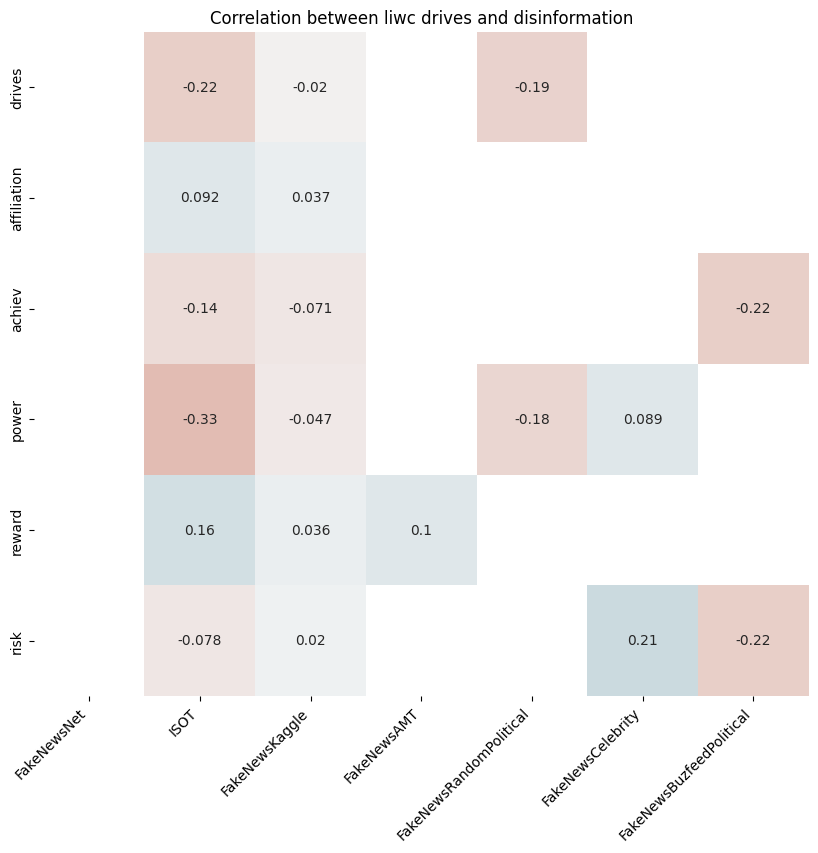

In [47]:
## plot liwc drives correlations

selected_columns = ['label'] + ['liwc_drives',
 'liwc_affiliation',
 'liwc_achiev',
 'liwc_power',
 'liwc_reward',
 'liwc_risk',]

all_corrs = pd.DataFrame()
all_masks = []
fig, ax = plt.subplots(figsize=(10,20))         # Sample figsize in inches
for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('liwc_') for column in selected_columns if (column.startswith('liwc_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)

    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
        ax=ax
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between liwc drives and disinformation')

--- FakeNewsNet ---


liwc_focuspast           liwc_focuspresent           liwc_focusfuture  \
                mean       std              mean       std             mean   
label                                                                         
0           0.041815  0.019036          0.063678  0.022353         0.009906   
1           0.040392  0.020511          0.072890  0.024795         0.010853   

                 
            std  
label            
0      0.008696  
1      0.011445

--- ISOT ---


liwc_focuspast           liwc_focuspresent           liwc_focusfuture  \
                mean       std              mean       std             mean   
label                                                                         
0           0.049666  0.020861          0.045878  0.020691         0.009676   
1           0.038474  0.019709          0.066579  0.024095         0.008601   

                 
            std  
label            
0      0.009736  
1      0.007663

--- FakeNewsKaggle ---


liwc_focuspast           liwc_focuspresent           liwc_focusfuture  \
                mean       std              mean       std             mean   
label                                                                         
0           0.044313  0.019221          0.057334  0.024019         0.008556   
1           0.031724  0.019083          0.072533  0.028470         0.009872   

                 
            std  
label            
0      0.006722  
1      0.009079

--- FakeNewsAMT ---


liwc_focuspast           liwc_focuspresent           liwc_focusfuture  \
                mean       std              mean       std             mean   
label                                                                         
0           0.038272  0.023811          0.056753  0.027997         0.010762   
1           0.039515  0.024402          0.070777  0.031255         0.013584   

                 
            std  
label            
0      0.011770  
1      0.013575

--- FakeNewsRandomPolitical ---


liwc_focuspast           liwc_focuspresent           liwc_focusfuture  \
                mean       std              mean       std             mean   
label                                                                         
0           0.040461  0.013713          0.056324  0.018342         0.010317   
1           0.039089  0.016351          0.060666  0.024617         0.009884   

                 
            std  
label            
0      0.008080  
1      0.006719

--- FakeNewsCelebrity ---


liwc_focuspast           liwc_focuspresent           liwc_focusfuture  \
                mean       std              mean       std             mean   
label                                                                         
0           0.049232  0.020814          0.069484  0.028114         0.008757   
1           0.043608  0.020853          0.085352  0.027686         0.011716   

                 
            std  
label            
0      0.006630  
1      0.009169

--- FakeNewsBuzfeedPolitical ---


liwc_focuspast           liwc_focuspresent          liwc_focusfuture  \
                mean       std              mean      std             mean   
label                                                                        
0           0.034751  0.014752          0.078270  0.02318         0.010730   
1           0.045017  0.019660          0.071029  0.02387         0.007863   

                 
            std  
label            
0      0.007575  
1      0.006360

Text(0.5, 1.0, 'Correlation between liwc time orientation and disinformation')

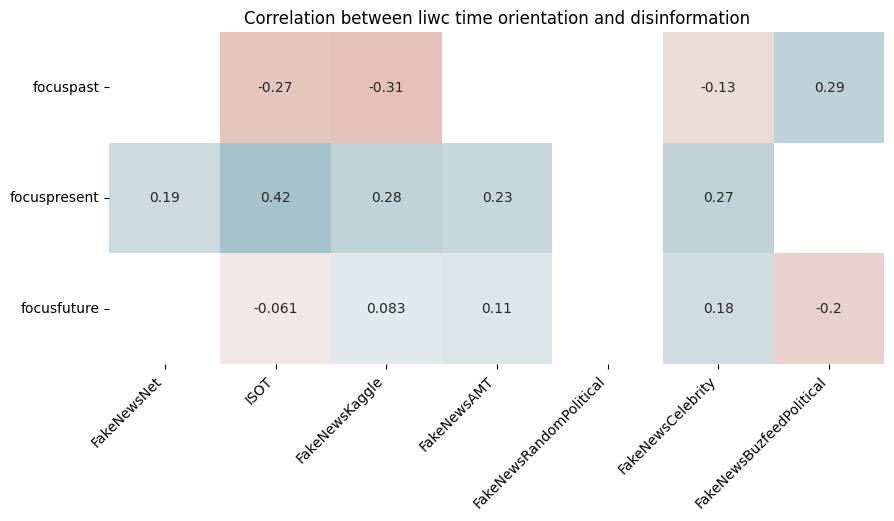

In [48]:
## plot liwc time orientation correlations

selected_columns = ['label'] + [ 'liwc_focuspast',
 'liwc_focuspresent',
 'liwc_focusfuture',]

all_corrs = pd.DataFrame()
all_masks = []
fig, ax = plt.subplots(figsize=(10,20))         # Sample figsize in inches
for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('liwc_') for column in selected_columns if (column.startswith('liwc_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)

    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
        ax=ax
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between liwc time orientation and disinformation')

--- FakeNewsNet ---


liwc_relativ           liwc_motion           liwc_space            \
              mean       std        mean       std       mean       std   
label                                                                     
0         0.136749  0.032695    0.015441  0.008525   0.069205  0.021024   
1         0.128804  0.031529    0.017054  0.008740   0.066523  0.021654   

      liwc_time            
           mean       std  
label                      
0      0.052488  0.020911  
1      0.045986  0.018268

--- ISOT ---


liwc_relativ          liwc_motion           liwc_space            \
              mean      std        mean       std       mean       std   
label                                                                    
0         0.144855  0.03593    0.015960  0.010509   0.080392  0.026210   
1         0.125864  0.03060    0.015885  0.009693   0.066509  0.021135   

      liwc_time            
           mean       std  
label                      
0      0.049148  0.020003  
1      0.044107  0.018398

--- FakeNewsKaggle ---


liwc_relativ           liwc_motion           liwc_space            \
              mean       std        mean       std       mean       std   
label                                                                     
0         0.133361  0.027935    0.016886  0.008335   0.071231  0.018653   
1         0.126896  0.034334    0.015852  0.010579   0.068540  0.024210   

      liwc_time            
           mean       std  
label                      
0      0.046019  0.015727  
1      0.043087  0.019789

--- FakeNewsAMT ---


liwc_relativ           liwc_motion           liwc_space            \
              mean       std        mean       std       mean       std   
label                                                                     
0         0.151011  0.045260    0.019465  0.015939   0.077127  0.034109   
1         0.145242  0.043307    0.020859  0.017674   0.072568  0.028502   

      liwc_time            
           mean       std  
label                      
0      0.055275  0.026674  
1      0.052699  0.025772

--- FakeNewsRandomPolitical ---


liwc_relativ           liwc_motion           liwc_space            \
              mean       std        mean       std       mean       std   
label                                                                     
0         0.126149  0.025765    0.015290  0.007838   0.064318  0.014768   
1         0.127926  0.022801    0.016707  0.009337   0.065650  0.016248   

      liwc_time            
           mean       std  
label                      
0      0.047631  0.017522  
1      0.046995  0.016509

--- FakeNewsCelebrity ---


liwc_relativ           liwc_motion           liwc_space            \
              mean       std        mean       std       mean       std   
label                                                                     
0         0.144221  0.033621    0.015359  0.008503   0.068322  0.019308   
1         0.133396  0.029807    0.015697  0.009441   0.064507  0.019046   

      liwc_time            
           mean       std  
label                      
0      0.062152  0.021680  
1      0.055671  0.020536

--- FakeNewsBuzfeedPolitical ---


liwc_relativ           liwc_motion           liwc_space            \
              mean       std        mean       std       mean       std   
label                                                                     
0         0.112591  0.022169    0.014490  0.007612   0.057602  0.014272   
1         0.119964  0.019877    0.016096  0.008305   0.062053  0.016095   

      liwc_time            
           mean       std  
label                      
0      0.041528  0.015560  
1      0.043499  0.014303

Text(0.5, 1.0, 'Correlation between liwc relativity and disinformation')

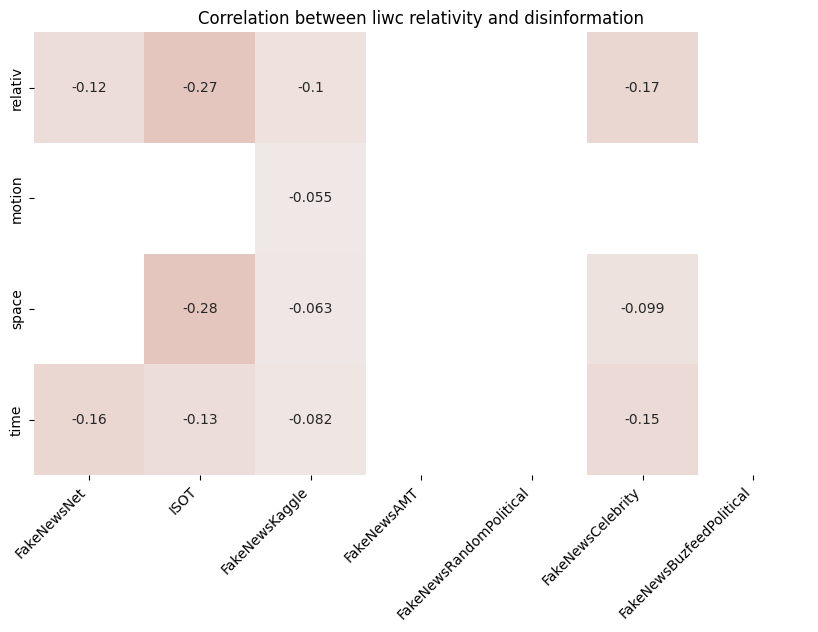

In [49]:


## plot liwc relativity correlations

selected_columns = ['label'] + ['liwc_relativ',
 'liwc_motion',
 'liwc_space',
 'liwc_time',]

all_corrs = pd.DataFrame()
all_masks = []
fig, ax = plt.subplots(figsize=(10,20))         # Sample figsize in inches
for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('liwc_') for column in selected_columns if (column.startswith('liwc_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)

    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
        ax=ax
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between liwc relativity and disinformation')

--- FakeNewsNet ---


liwc_work           liwc_leisure           liwc_home            \
           mean       std         mean       std      mean       std   
label                                                                  
0      0.039163  0.023418     0.009115  0.010659  0.003528  0.005758   
1      0.035294  0.021011     0.009695  0.010038  0.004471  0.006702   

      liwc_money           liwc_relig           liwc_death            
            mean       std       mean       std       mean       std  
label                                                                 
0       0.008473  0.014426   0.003075  0.009029   0.002304  0.004282  
1       0.008891  0.012310   0.005871  0.013250   0.003961  0.006901

--- ISOT ---


liwc_work           liwc_leisure           liwc_home            \
           mean       std         mean       std      mean       std   
label                                                                  
0      0.055868  0.028178     0.006506  0.008275  0.004461  0.006941   
1      0.038571  0.024004     0.009871  0.010493  0.003791  0.006006   

      liwc_money           liwc_relig           liwc_death            
            mean       std       mean       std       mean       std  
label                                                                 
0       0.014458  0.018978   0.005042  0.009378   0.002398  0.005761  
1       0.009648  0.013786   0.003738  0.009506   0.002398  0.004901

--- FakeNewsKaggle ---


liwc_work           liwc_leisure           liwc_home            \
           mean       std         mean       std      mean       std   
label                                                                  
0      0.043685  0.023646     0.012592  0.012288  0.004117  0.005403   
1      0.036358  0.023532     0.009130  0.011651  0.002869  0.005390   

      liwc_money           liwc_relig           liwc_death            
            mean       std       mean       std       mean       std  
label                                                                 
0       0.010568  0.013954   0.003487  0.008319   0.002489  0.004562  
1       0.010611  0.015329   0.004011  0.009960   0.002917  0.005614

--- FakeNewsAMT ---


liwc_work           liwc_leisure           liwc_home            \
           mean       std         mean       std      mean       std   
label                                                                  
0      0.061907  0.043442     0.017831  0.021303  0.003250  0.007277   
1      0.055003  0.040824     0.017679  0.021504  0.003771  0.007629   

      liwc_money           liwc_relig           liwc_death            
            mean       std       mean       std       mean       std  
label                                                                 
0       0.016230  0.025486   0.001277  0.003744   0.001588  0.005754  
1       0.016331  0.024542   0.001421  0.004298   0.001797  0.006448

--- FakeNewsRandomPolitical ---


liwc_work           liwc_leisure           liwc_home            \
           mean       std         mean       std      mean       std   
label                                                                  
0      0.061076  0.022033     0.008073  0.005611  0.003478  0.004189   
1      0.037088  0.020254     0.009090  0.009324  0.003278  0.005038   

      liwc_money           liwc_relig           liwc_death            
            mean       std       mean       std       mean       std  
label                                                                 
0       0.015462  0.016545   0.001965  0.003590   0.001195  0.002539  
1       0.007027  0.006938   0.003136  0.005781   0.003371  0.007631

--- FakeNewsCelebrity ---


liwc_work           liwc_leisure           liwc_home            \
           mean       std         mean       std      mean       std   
label                                                                  
0      0.019170  0.012923     0.023415  0.014943  0.004948  0.007290   
1      0.018493  0.013173     0.017919  0.013261  0.003918  0.006217   

      liwc_money           liwc_relig           liwc_death            
            mean       std       mean       std       mean       std  
label                                                                 
0       0.004156  0.006035   0.001664  0.004478   0.001148  0.002921  
1       0.004425  0.007771   0.001798  0.005428   0.001106  0.003305

--- FakeNewsBuzfeedPolitical ---


liwc_work           liwc_leisure           liwc_home            \
           mean       std         mean       std      mean       std   
label                                                                  
0      0.039257  0.022052     0.009271  0.009858  0.002999  0.003183   
1      0.031603  0.019954     0.008740  0.008125  0.003143  0.005748   

      liwc_money           liwc_relig           liwc_death            
            mean       std       mean       std       mean       std  
label                                                                 
0       0.009801  0.015099   0.003295  0.006598   0.001978  0.003286  
1       0.009600  0.010418   0.008083  0.017355   0.002995  0.006874

Text(0.5, 1.0, 'Correlation between liwc personal concerns and disinformation')

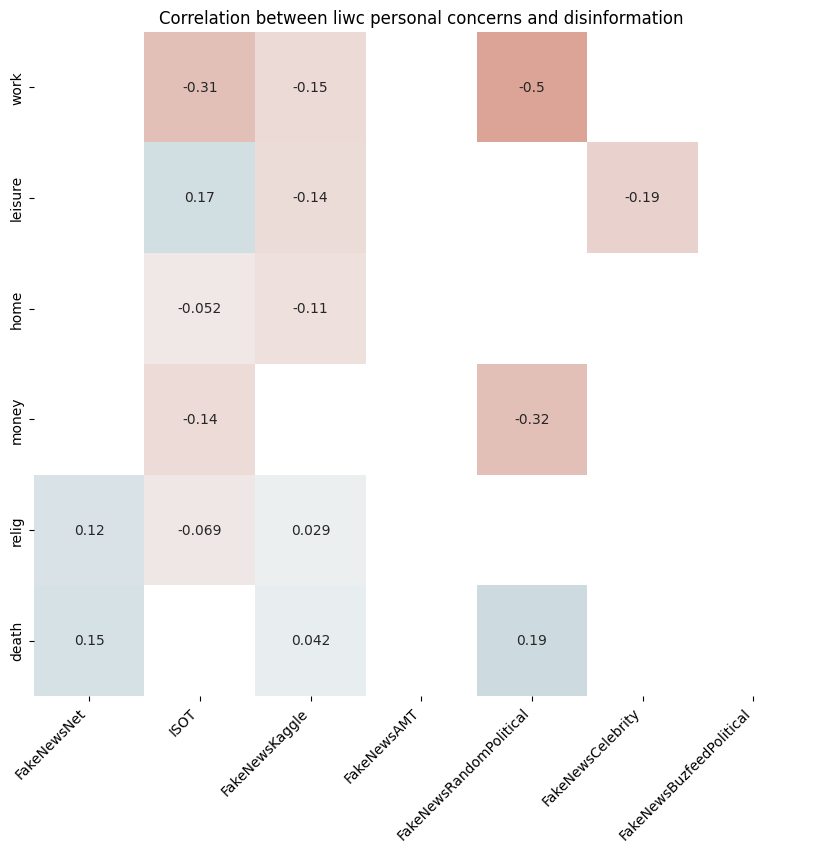

In [50]:


## plot liwc personal concerns correlations

selected_columns = ['label'] + ['liwc_work',
 'liwc_leisure',
 'liwc_home',
 'liwc_money',
 'liwc_relig',
 'liwc_death',]

all_corrs = pd.DataFrame()
all_masks = []
fig, ax = plt.subplots(figsize=(10,20))         # Sample figsize in inches
for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('liwc_') for column in selected_columns if (column.startswith('liwc_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)

    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
        ax=ax
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between liwc personal concerns and disinformation')

--- FakeNewsNet ---


liwc_informal           liwc_swear           liwc_netspeak            \
               mean       std       mean       std          mean       std   
label                                                                        
0          0.003995  0.005989   0.000400  0.001218      0.001530  0.004976   
1          0.004377  0.005215   0.001044  0.002683      0.001396  0.003296   

      liwc_assent           liwc_nonflu           liwc_filler            
             mean       std        mean       std        mean       std  
label                                                                    
0        0.000831  0.001719    0.001205  0.002039    0.000035  0.000258  
1        0.000608  0.001627    0.001186  0.001992    0.000068  0.000459

--- ISOT ---


liwc_informal           liwc_swear           liwc_netspeak            \
               mean       std       mean       std          mean       std   
label                                                                        
0          0.001275  0.003101   0.000068  0.000517      0.000535  0.002348   
1          0.004154  0.006310   0.000965  0.002760      0.001276  0.003765   

      liwc_assent           liwc_nonflu           liwc_filler            
             mean       std        mean       std        mean       std  
label                                                                    
0        0.000278  0.001431    0.000410  0.001417    0.000009  0.000210  
1        0.000934  0.002662    0.000942  0.002614    0.000073  0.000717

--- FakeNewsKaggle ---


liwc_informal           liwc_swear           liwc_netspeak            \
               mean       std       mean       std          mean       std   
label                                                                        
0          0.003193  0.005024   0.000238  0.001110      0.001893  0.004297   
1          0.003380  0.006019   0.000682  0.002857      0.001198  0.004027   

      liwc_assent           liwc_nonflu           liwc_filler            
             mean       std        mean       std        mean       std  
label                                                                    
0        0.000396  0.001132    0.000637  0.001295    0.000033  0.000390  
1        0.000755  0.002623    0.000818  0.001891    0.000062  0.000576

--- FakeNewsAMT ---


liwc_informal           liwc_swear           liwc_netspeak            \
               mean       std       mean       std          mean       std   
label                                                                        
0          0.002226  0.005493   0.000086  0.000775      0.001203  0.004705   
1          0.002748  0.008233   0.000056  0.000629      0.001590  0.007358   

      liwc_assent           liwc_nonflu           liwc_filler            
             mean       std        mean       std        mean       std  
label                                                                    
0        0.000324  0.001807    0.000563  0.002216    0.000026  0.000398  
1        0.000398  0.002101    0.000660  0.002803    0.000000  0.000000

--- FakeNewsRandomPolitical ---


liwc_informal           liwc_swear           liwc_netspeak           \
               mean       std       mean       std          mean      std   
label                                                                       
0          0.001710  0.002047   0.000045  0.000195      0.000807  0.00162   
1          0.003223  0.004656   0.000805  0.003064      0.001065  0.00262   

      liwc_assent           liwc_nonflu           liwc_filler            
             mean       std        mean       std        mean       std  
label                                                                    
0        0.000434  0.000872    0.000430  0.000829    0.000000  0.000000  
1        0.000559  0.001331    0.000696  0.001294    0.000098  0.000849

--- FakeNewsCelebrity ---


liwc_informal           liwc_swear           liwc_netspeak            \
               mean       std       mean       std          mean       std   
label                                                                        
0          0.004254  0.005415   0.000340  0.001237      0.001589  0.003469   
1          0.003926  0.005529   0.000671  0.002335      0.000835  0.003017   

      liwc_assent           liwc_nonflu           liwc_filler            
             mean       std        mean       std        mean       std  
label                                                                    
0        0.000896  0.001917    0.001150  0.002171    0.000033  0.000244  
1        0.001002  0.002822    0.000918  0.001840    0.000109  0.000677

--- FakeNewsBuzfeedPolitical ---


liwc_informal           liwc_swear           liwc_netspeak            \
               mean       std       mean       std          mean       std   
label                                                                        
0          0.002689  0.002915   0.000455  0.000989      0.000397  0.000938   
1          0.002458  0.003221   0.000777  0.001767      0.000856  0.002227   

      liwc_assent           liwc_nonflu           liwc_filler            
             mean       std        mean       std        mean       std  
label                                                                    
0        0.000857  0.001445    0.000758  0.001178    0.000045  0.000228  
1        0.000370  0.000995    0.000438  0.001178    0.000044  0.000306

Text(0.5, 1.0, 'Correlation between liwc informal language and disinformation')

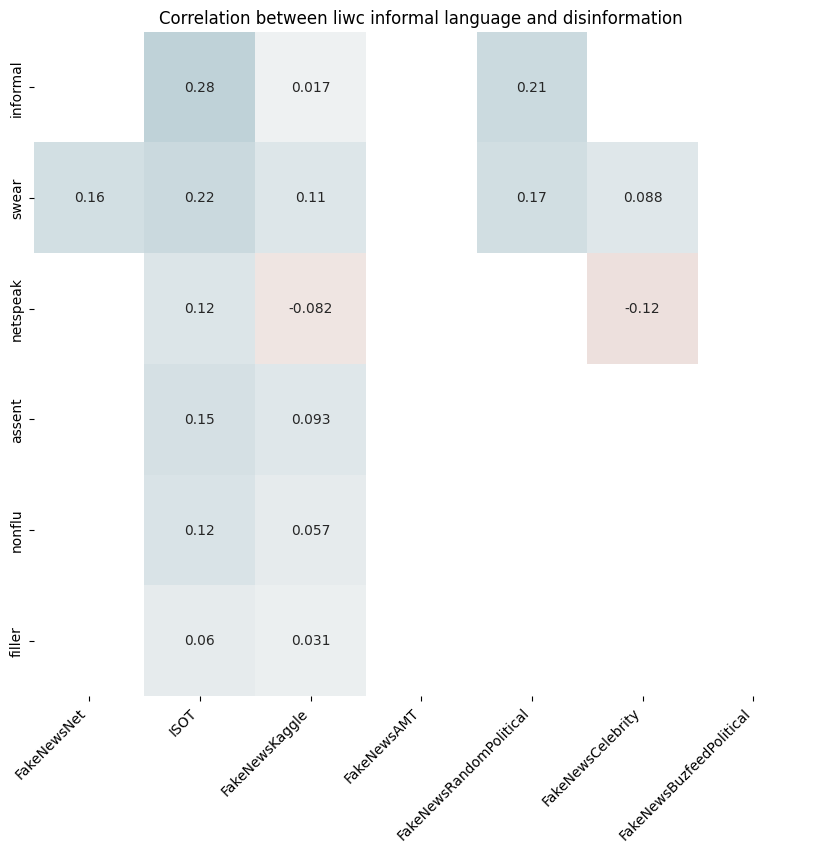

In [51]:


## plot liwc informal language correlations

selected_columns = ['label'] + ['liwc_informal',
 'liwc_swear',
 'liwc_netspeak',
 'liwc_assent',
 'liwc_nonflu',
 'liwc_filler']

all_corrs = pd.DataFrame()
all_masks = []
fig, ax = plt.subplots(figsize=(10,20))         # Sample figsize in inches
for dataset_name, dataset in datasets.items():
    
    columns_names = [column.removeprefix('liwc_') for column in selected_columns if (column.startswith('liwc_')) ]
    corr = dataset[selected_columns].corr()[['label']].drop('label')
    p_values = corr_sig(dataset[selected_columns])                     # get p-Value
    mask = np.invert(np.tril(p_values<0.05, k=-1))[1:, 0]

    # append to all_corrs
    all_corrs = pd.concat([all_corrs, corr], axis=1)

    all_masks.append(mask)

    print('--- {dataset_name} ---'.format(dataset_name=dataset_name))
    display(dataset[selected_columns].groupby('label').agg(['mean', 'std']))
    
sns.heatmap(
        all_corrs,
        mask=np.column_stack(all_masks),
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        cbar= False,
        ax=ax
)
ax.set_yticklabels(columns_names)
ax.set_xticklabels(
    datasets.keys(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title('Correlation between liwc informal language and disinformation')